In [2]:
import pandas as pd
from scipy.stats import kendalltau, pearsonr, spearmanr
import itertools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Analysis of All Catchments So Far

- currently provided with 466 catchment-worth of data, 24% less than 618 reported in Nienke's sample
- cross correlation 
['ndvi', 'evi', 'nbr', 'ndmi', 'gndvi', 'ndbi', 'BRIGHTNESS','GREENNESS', 'WETNESS']
                                                    VS
['AI', 'EI', 'SI', 'ST', 'T', 'is_dur', 'omega']

and their respective pairs to find the highest corresponding pairs

In [3]:
abs_path = 'C:/users/creeb/ThesisGit/Thesis_Git_MOH'

folder = 'Budyko' 

if not os.path.exists(f'../Outputs/{dataset}/{folder}/'):
    print('created')
    os.makedirs(f'../Outputs/{dataset}/{folder}/')

path = f'../Outputs/{dataset}/{folder}/'

meuse = pd.read_excel(f'{abs_path}/meuse/meuse_all_decadal_indices_combined_1.xlsx')#, index_col='system_index')
meuse_delta = pd.read_excel(f'{abs_path}/meuse/meuse_all_decadal_delta_1.xlsx')#, index_col='system_index')

#ThesisGit/Thesis_Git_MOH/meuse/meuse_all_decadal_indices_combined_1.xlsx

GB = pd.read_excel(f'{abs_path}/camels_GB/camels_GB_all_decadal_indices_combined_1.xlsx')#, index_col='system_index')
GB_delta = pd.read_excel(f'{abs_path}/camels_GB/camels_GB_all_decadal_delta_1.xlsx')#, index_col='system_index')


USA = pd.read_excel(f'{abs_path}/camels_USA/camels_USA_all_decadal_indices_combined_1.xlsx')#, index_col='system_index')
USA_delta = pd.read_excel(f'{abs_path}/camels_USA/camels_USA_all_decadal_delta_1.xlsx')#, index_col='system_index')

SR_indices = meuse.keys()[14:23]
SR_delta_indices = meuse_delta.keys()[14:23]
SR_exclude = meuse.keys()[0:23]
SR_delta_exclude =  meuse_delta.keys()[0:23]
GB


Unnamed: 0          system_index country_code  catchment_name  \
0             0  000000000000000000c6           GB           31023   
1             1  00000000000000000084           GB           27051   
2             2  000000000000000001df           GB           55008   
3             3  00000000000000000082           GB           27047   
4             4  0000000000000000021b           GB           67010   
..          ...                   ...          ...             ...   
185         185  0000000000000000025a           GB           79002   
186         186  00000000000000000207           GB           62001   
187         187  000000000000000001c0           GB           54008   
188         188  00000000000000000235           GB           71001   
189         189  00000000000000000088           GB           27071   

     decade_ending     LT_AI     LT_EI       LT_SR          B1          B2  \
0             1999  0.832453  0.757562  276.109928  554.824370  823.114089   
1             1999  0.617836  0.508876  174.590127  584.123481  904.080146   
2             1999  0.212182  0.180242   93.997790  623.878046  846.779378   
3             1999  0.259286  0.140039   49.283609  570.353249  800.212860   
4             1999  0.242187  0.177813   80.284097  636.915087  861.069729   
..             ...       ...       ...         ...         ...         ...   
185           2009  0.309349  0.263076  112.961888  643.551528  877.908353   
186           2009  0.396999  0.272732  105.037037  521.552653  804.113788   
187           2009  0.630884  0.528647  191.328116  640.524403  912.649778   
188           2009  0.376212  0.328048  124.437664  556.336791  822.130505   
189           2009  0.605905  0.443720  141.363853  548.924261  822.740036   

     ...    is_dur     omega        dp        sp        dt        st  \
0    ...  4.378709  4.302864  0.190508  0.609697  6.398308  0.310383   
1    ...  3.877133  2.678121  0.270866  0.684427  6.013172  0.310766   
2    ...  3.196498  1.924136  0.400478  0.727648  5.564533  0.318734   
3    ...  3.226691  1.393414  0.432828  0.718271  5.924309  0.310691   
4    ...  3.271863  1.486803  0.476439  0.740320  5.574993  0.316643   
..   ...       ...       ...       ...       ...       ...       ...   
185  ...  3.137112  2.175530  0.354906  0.658093  5.519755  0.322293   
186  ...  3.181982  1.542914  0.416709  0.650262  5.318979  0.330350   
187  ...  3.766031  2.609451  0.180864  0.625262  5.872995  0.322216   
188  ...  3.244565  2.075554  0.310374  0.617871  6.046760  0.319376   
189  ...  3.434057  1.890516  0.211937  0.603717  6.065851  0.322276   

           sd        de        se   Sr actual  
0    0.299314  0.941897  0.238733  355.945833  
1    0.373661  0.949198  0.235746  218.068203  
2    0.408914  0.910475  0.239090   70.344494  
3    0.407581  0.989664  0.235601   49.274471  
4    0.423677  0.936919  0.238081   55.860515  
..        ...       ...       ...         ...  
185  0.335800  0.951026  0.226497   90.610722  
186  0.319912  0.891309  0.227479   72.280908  
187  0.303046  0.891617  0.230289  160.994650  
188  0.298495  0.923730  0.230696   95.372714  
189  0.281441  0.919158  0.231000   97.031909  

[190 rows x 41 columns]

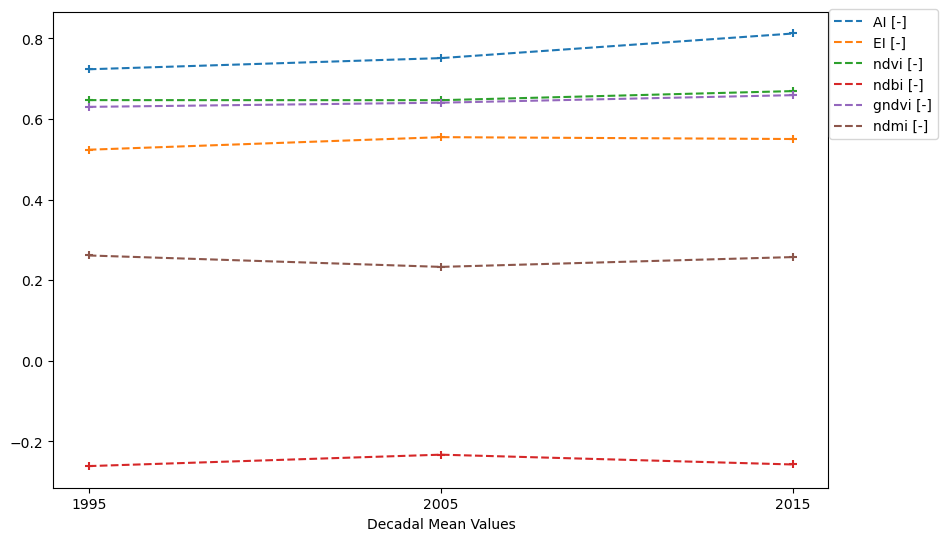

In [4]:
meuse_grouped = meuse.groupby('system_index')

label = ['AI', 'EI', 'ndvi', 'ndbi', 'gndvi', 'ndmi']


plt.figure(figsize=(10, 6.18))

for i, (group, data) in enumerate(meuse_grouped):
    if group == '00000000000000000027':
        for j in label:
            plt.plot(data.decade_ending, data.loc[:, j], ls='--', label=f'{j} [-]')
            plt.scatter(data.decade_ending, data.loc[:, j], marker='+')
            plt.xticks(data.decade_ending)
            plt.xlabel(f'Decadal Mean Values')
            plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.02))
        #display(data)

In [5]:
def key_intersection(df1, df2, df3):
    k1 , k2, k3 = set(df1.keys().values), set(df2.keys().values), set(df3.keys().values)
    intersection = k1.intersection(k2).intersection(k3)
    return intersection

def kendall_pval(x,y):
    return kendalltau(x,y)[1]

def pearsonr_pval(x,y):
    return pearsonr(x,y)[1]

def spearmanr_pval(x,y):
    return spearmanr(x,y)[1]


In [6]:
keys = key_intersection(meuse, GB, USA)#.symmetric_difference(SR_indices)
d_keys = key_intersection(meuse_delta, GB_delta, USA_delta)#.symmetric_difference(SR_delta_indices)

WB_keys = {'LT_AI', 'LT_EI', 'LT_SR', 'AI', 'EI', 'SI', 'ST', 'T', 'is_dur', 'omega'}


In [7]:
def create_combined_table(df1, df2, df3, keys):
    combo = pd.DataFrame()
    for key in keys:
        a = df1.loc[:, key]
        b = df2.loc[:, key]
        c = df3.loc[:, key]
        
        combo_col = list(itertools.chain(*(a.to_list(),
                                                 b.to_list(),
                                                c.to_list(),))) 
        
        combo[key] = combo_col
    
    prs_r = combo.corr()
    
    p = combo.corr(method=pearsonr_pval)
    
    return [combo, prs_r, p]
        

In [8]:
combo, prs_r, p = create_combined_table(meuse, GB, USA, keys)
d_combo, d_r, d_p = create_combined_table(meuse_delta, GB_delta, USA_delta, d_keys)

In [9]:
def sorted_p(p):
    p.replace(1, np.nan)
    sorted_p = pd.DataFrame()

    for i in p.keys()[:]:
        sort = pd.DataFrame(p.loc[:, i].sort_values(ascending=False))
        sorted_p[f'{i}_vs'] = sort.index
        sorted_p[f'{i}_p'] = sort.values
    return sorted_p

In [10]:
sort_p = sorted_p(p)
sort_dp = sorted_p(d_p)

In [11]:
def plot_descending_P(SR_index:[], df_all, sorted_p, prs_r, exclude, delta=False, plot=False, savefig=False, color_by=str, levels=[]):
    '''
    The function loops through the list of Surface Reflectance indices passed. The plotting returns scatters in descending
    order from   to:  1 > p-value > 0.01 
    '''
    ls = []
    
    for i in SR_index:
        
        if delta==True:
            i = f'd_{i}'

        high_to_low_id = sorted_p.loc[:, f'{i}_vs']
        high_to_low_p = sorted_p.loc[:, f'{i}_p']
        
        for j in zip(high_to_low_id, high_to_low_p):
            if j[1] < 0.1 and j[0] not in exclude:
                
                
                r = prs_r.loc[i, j[0]]
                ls.append((i, j[0], j[1], r))
                
                
                if plot == True:
                    plt.figure(figsize=(10, 6.18))
                    
                    
                    
                    x = df_all.loc[:, i] 

                    y = df_all.loc[:, j[0]]


                    plt.suptitle(f'$p$: {j[1]:.3e}, $r$= {r:.3e}, $n$ = {len(x)}')
        
                    plt.xlabel(i)

                    plt.ylabel(j[0])
                
                
                if delta==True and plot == True:
                    
                    plt.title(f'$\Delta$ {i[2:]}  vs $\Delta$ {j[0][2:]}')
                    
                    plt.scatter(x, y, c=df_all.loc[:,  color_by], alpha=0.6)
    
                    plt.colorbar(ticks=levels, label=color_by)
                    
                    plt.xlabel(f'$\Delta${i[2:]}')

                    plt.ylabel(f'$\Delta${j[0][2:]}')
        
                    if savefig == True:
                
                        plt.savefig(f'outputs/SR_delta_correlations/{i}_{j[0]}_{color_by}')

                elif delta==False and plot == True:    
                    

                    plt.title(f'{i} vs  {j[0]}')
                    
                    plt.scatter(x, y, c=df_all.loc[:,  color_by], alpha=0.6)
                    
                    plt.colorbar(ticks=levels, label=color_by)
                    
                    if savefig == True:
                        plt.savefig(f'outputs/SR_correlations/{i}_{j[0]}_{color_by}')
                
                ##if j[1] <= 0.1:
                    #break
                
            else:
                None
        
    return ls

FileNotFoundError: [Errno 2] No such file or directory: 'outputs/SR_correlations/ndvi_omega_LT_AI.png'

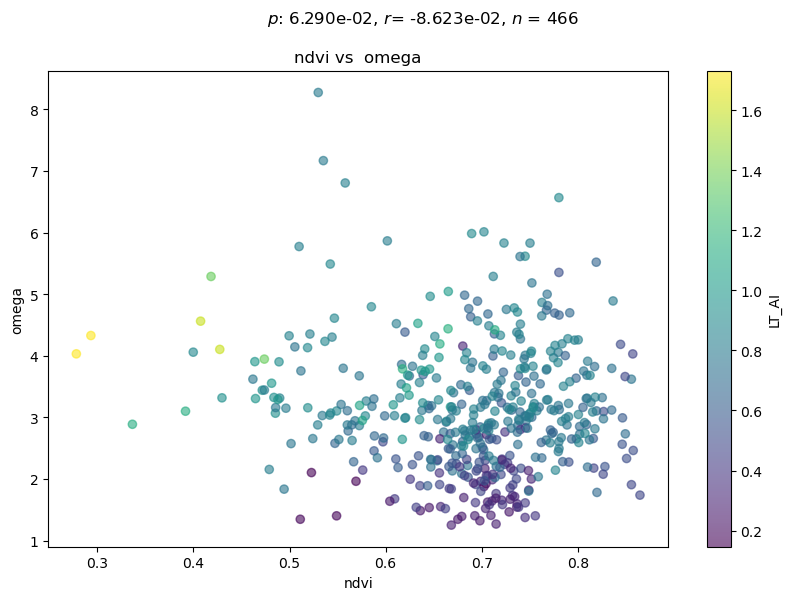

In [12]:
#SR_indices
years_levels = [1989, 1999, 2009, 2015]
AI_levels = [0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]
AI_levels_used = [0.2, 0.4, 0.6, 0.8, 1, 1.2]

 
#ranking = plot_descending_P(SR_indices, combo, sort_p, prs_r, SR_exclude, delta=False, plot=True, savefig=False, color_by='decade_ending', levels = years_levels)
ranking = plot_descending_P(SR_indices, combo, sort_p, prs_r, SR_exclude, delta=False, plot=True, savefig=True, color_by='LT_AI', levels = AI_levels)

#sort_p.keys()

In [12]:
df_ranking = pd.DataFrame(ranking, columns= ['SR_ind', 'WB_Clim_ind', 'prs_P', 'prs_R']).sort_values('prs_P')
df_ranking.to_excel(f'outputs/SR_correlations/ranking_correlatons.xlsx')
df_ranking

SR_ind WB_Clim_ind         prs_P     prs_R
36        ndbi      is_dur  1.216660e-43  0.582255
23        ndmi      is_dur  1.216660e-43 -0.582255
55     WETNESS      is_dur  1.451799e-40 -0.564460
35        ndbi          AI  8.293767e-35  0.527972
22        ndmi          AI  8.293767e-35 -0.527972
16         nbr      is_dur  1.269822e-32 -0.512868
54     WETNESS          ST  4.333393e-32 -0.509065
15         nbr          AI  1.263753e-31 -0.505710
53     WETNESS          AI  7.796047e-31 -0.499919
34        ndbi          ST  4.870574e-27  0.470450
21        ndmi          ST  4.870574e-27 -0.470450
48   GREENNESS          AI  1.051997e-22 -0.432874
47   GREENNESS      is_dur  4.405111e-22 -0.427077
14         nbr          ST  4.650041e-22 -0.426856
33        ndbi          EI  1.024464e-18  0.393580
20        ndmi          EI  1.024464e-18 -0.393580
52     WETNESS          SI  5.384258e-18 -0.385889
19        ndmi          SI  1.825643e-16 -0.368847
32        ndbi          SI  1.825643e-16  0.368847
13         nbr          EI  2.368440e-16 -0.367548
51     WETNESS          EI  1.794814e-15 -0.357228
46   GREENNESS          EI  6.509212e-15 -0.350462
6         ndvi          AI  3.555036e-13 -0.328344
41  BRIGHTNESS           T  2.805509e-12 -0.316182
12         nbr          SI  8.626971e-11 -0.294698
40  BRIGHTNESS       omega  3.444118e-10 -0.285485
29       gndvi          AI  2.277611e-09 -0.272344
5         ndvi      is_dur  3.041504e-09 -0.270269
45   GREENNESS       omega  2.309157e-08 -0.255204
28       gndvi      is_dur  1.203528e-06 -0.222674
4         ndvi          ST  1.874914e-06 -0.218711
3         ndvi          EI  5.231594e-06 -0.209241
44   GREENNESS          ST  1.094873e-05 -0.202148
27       gndvi          ST  2.710019e-05 -0.193088
39  BRIGHTNESS          EI  3.458991e-05 -0.190576
31        ndbi       omega  4.078433e-05  0.188861
18        ndmi       omega  4.078433e-05 -0.188861
43   GREENNESS          SI  1.698162e-04 -0.173331
11         nbr       omega  2.547977e-04 -0.168663
38  BRIGHTNESS      is_dur  3.352977e-04 -0.165434
50     WETNESS           T  5.826847e-04 -0.158749
26       gndvi          EI  6.172192e-04 -0.158037
30        ndbi           T  1.543258e-03  0.146285
17        ndmi           T  1.543258e-03 -0.146285
25       gndvi          SI  3.532427e-03 -0.134879
24       gndvi           T  4.880704e-03  0.130188
2         ndvi          SI  5.358025e-03 -0.128806
1         ndvi           T  9.365656e-03  0.120255
49     WETNESS       omega  1.010378e-02 -0.119053
10         evi           T  1.016317e-02  0.118960
42   GREENNESS           T  1.330926e-02 -0.114600
9          evi      is_dur  3.658112e-02  0.096869
37  BRIGHTNESS          AI  4.290022e-02 -0.093836
8          evi          AI  5.184472e-02  0.090132
7          evi          EI  5.973413e-02  0.087285
0         ndvi       omega  6.290043e-02 -0.086229

C:\Users\creeb\AppData\Local\Temp\ipykernel_42804\2460716832.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10, 6.18))


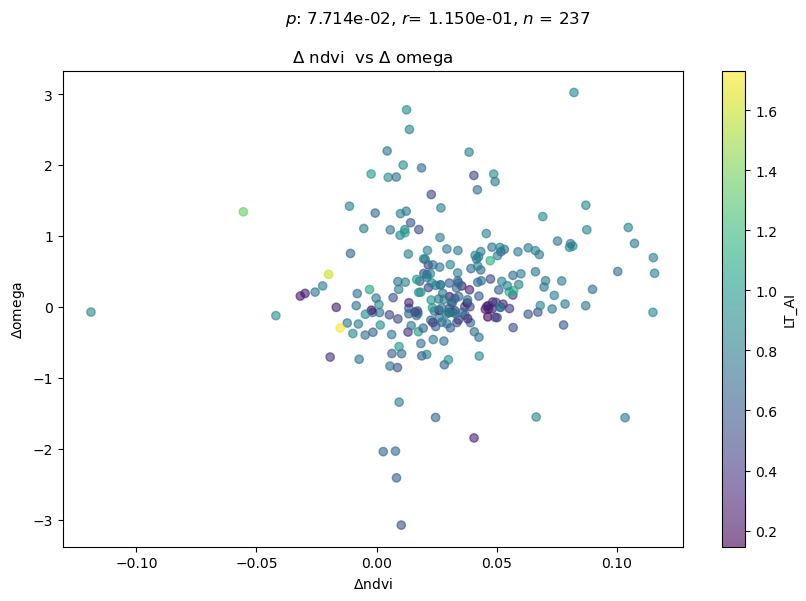

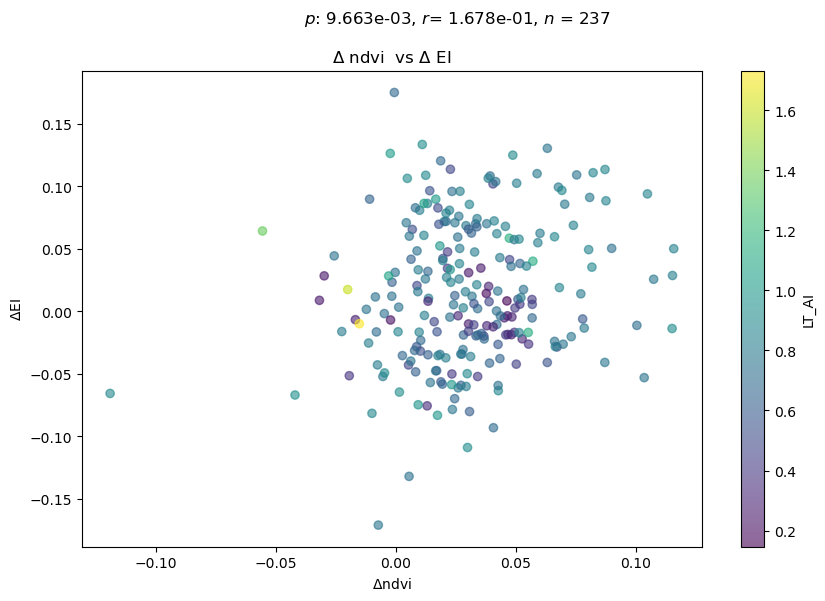

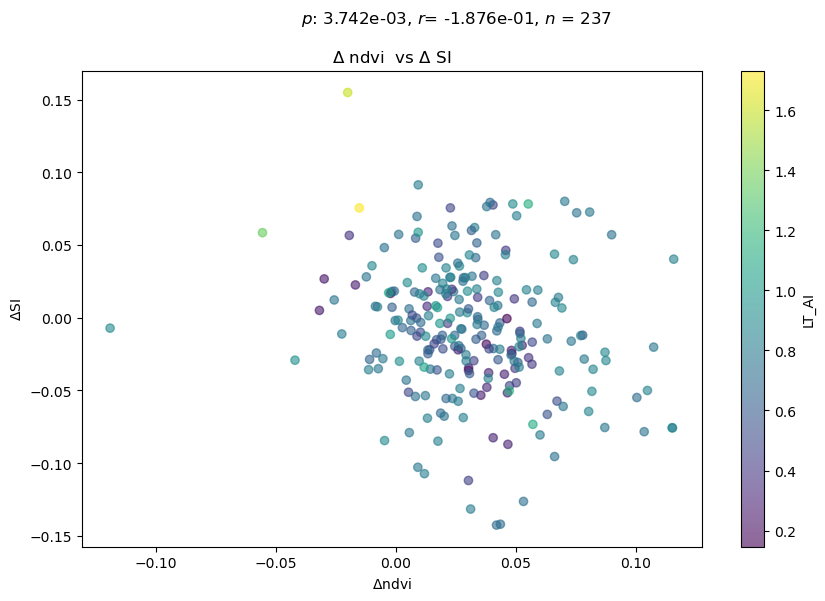

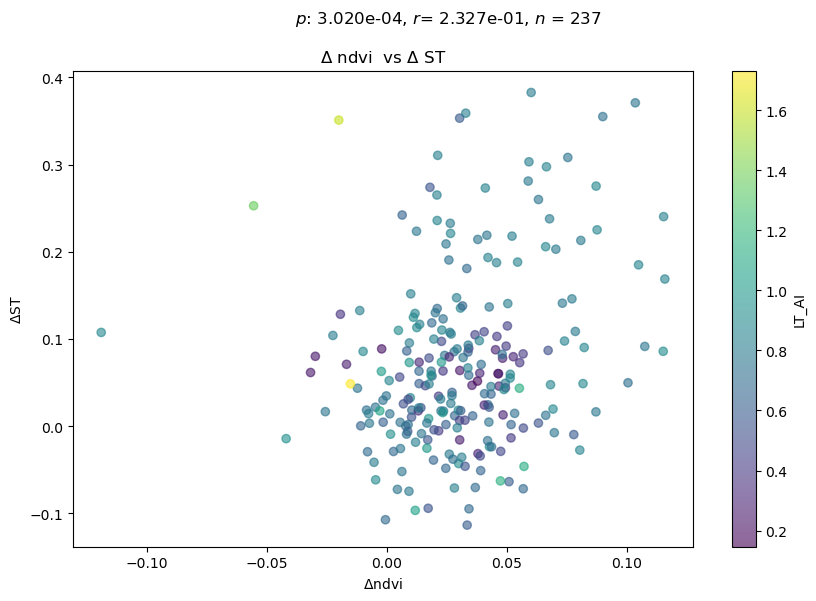

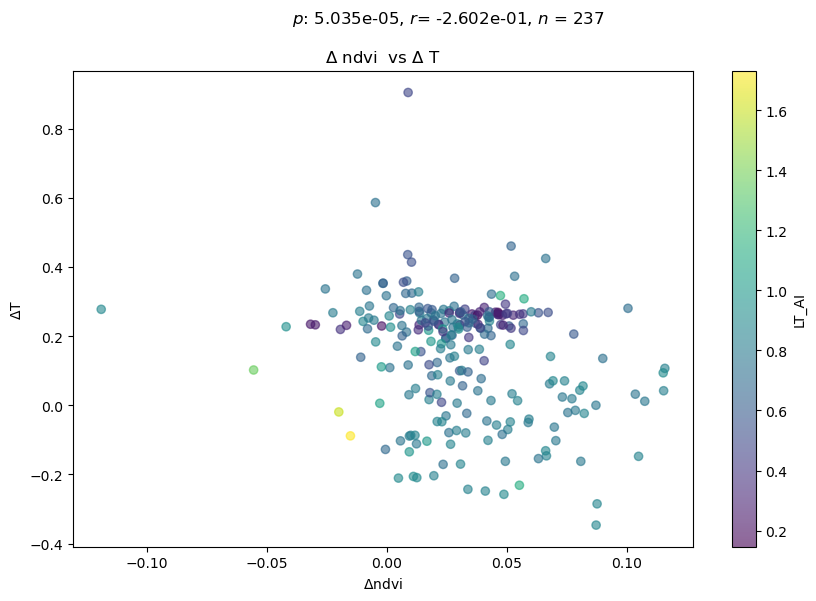

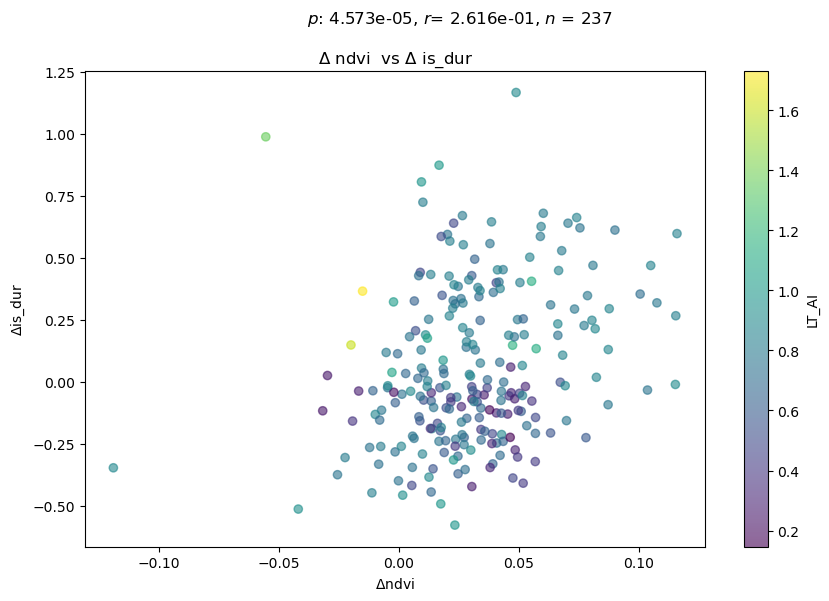

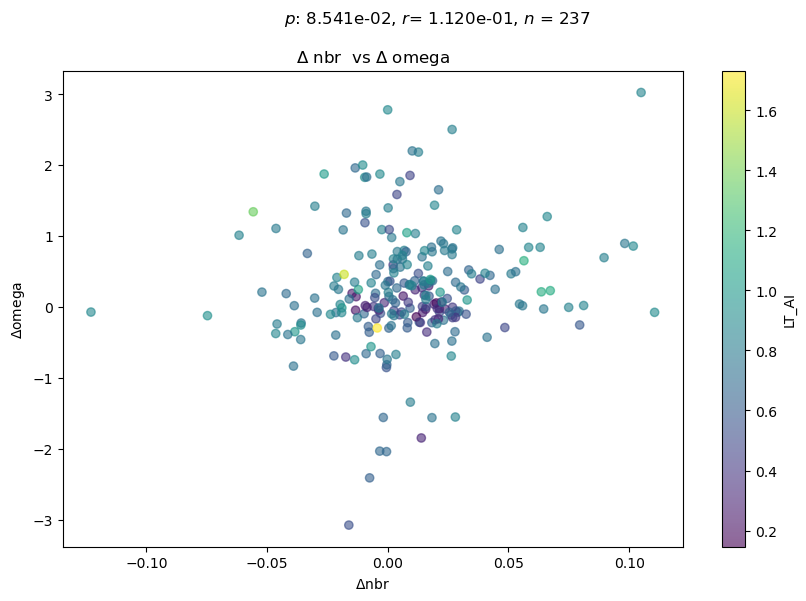

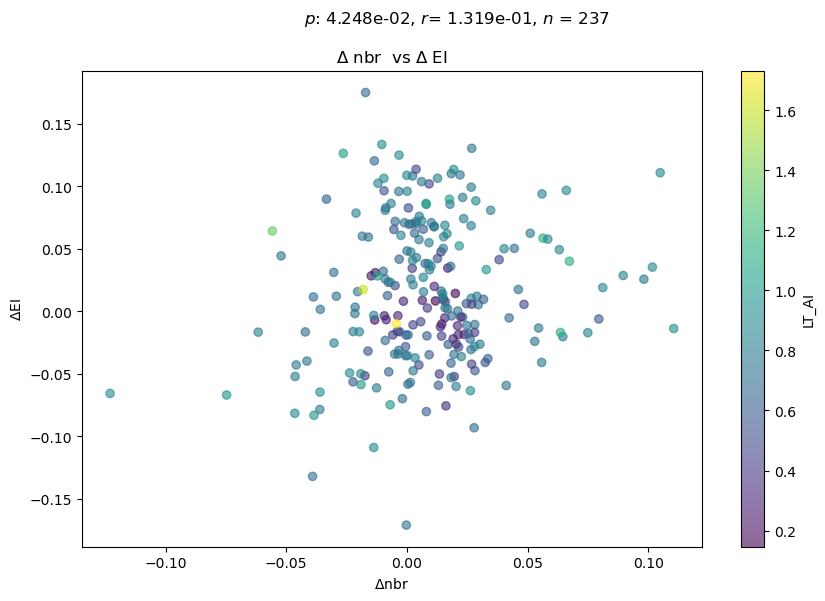

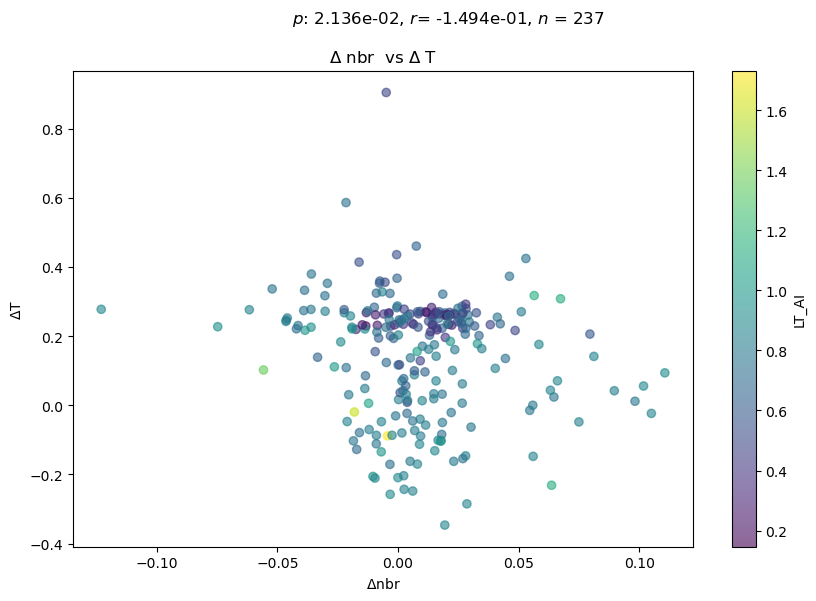

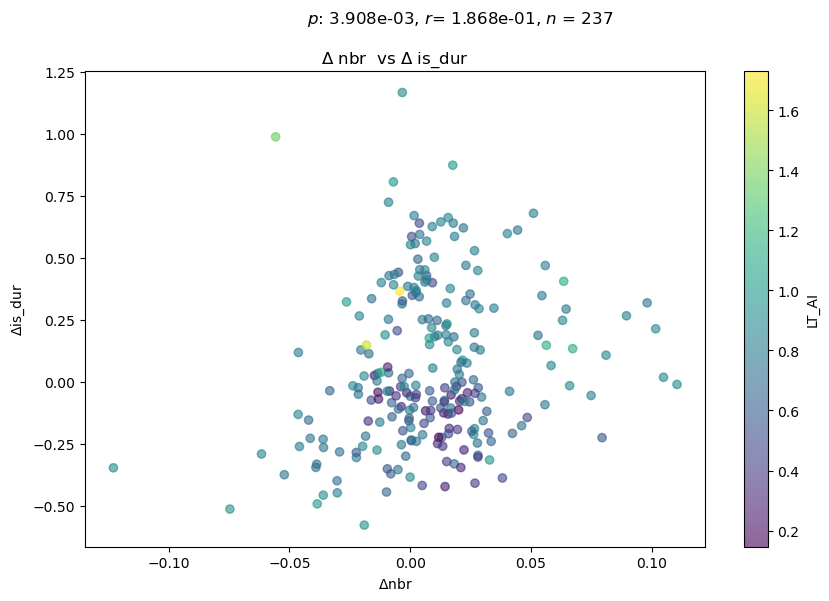

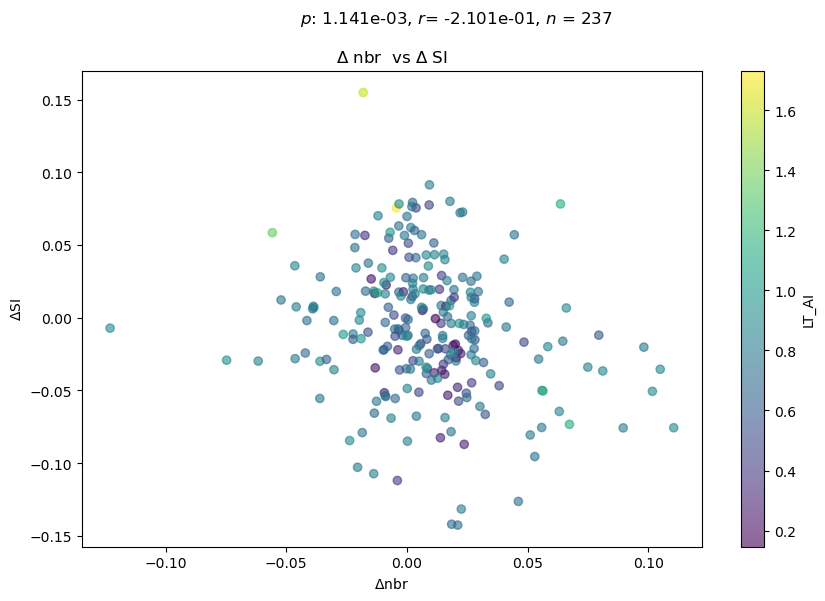

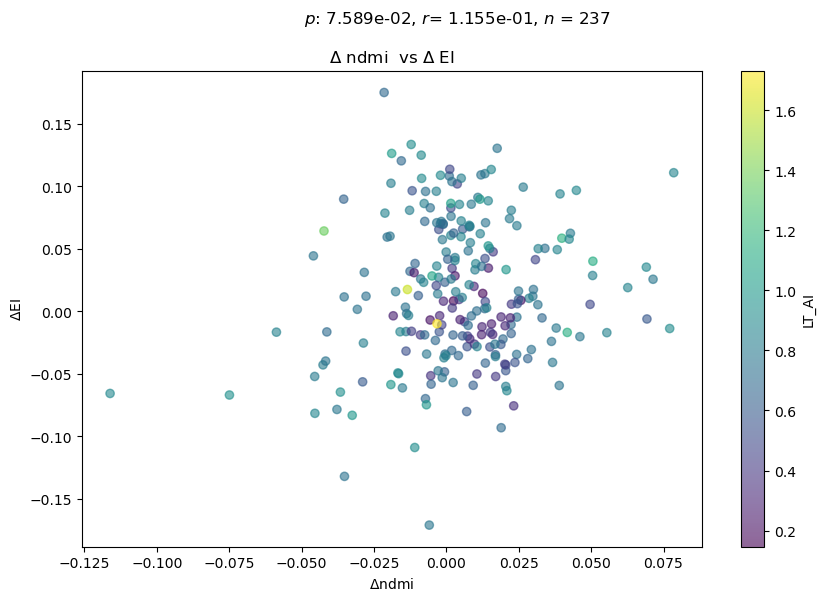

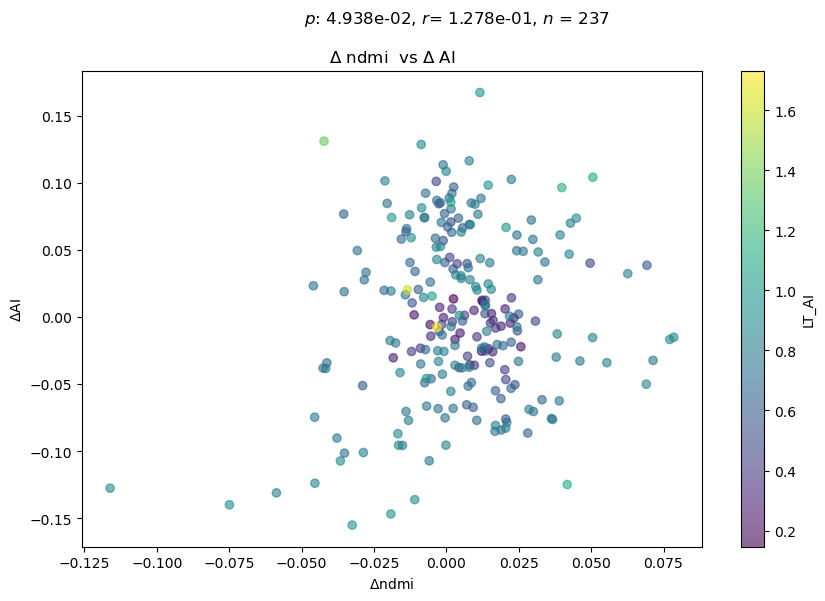

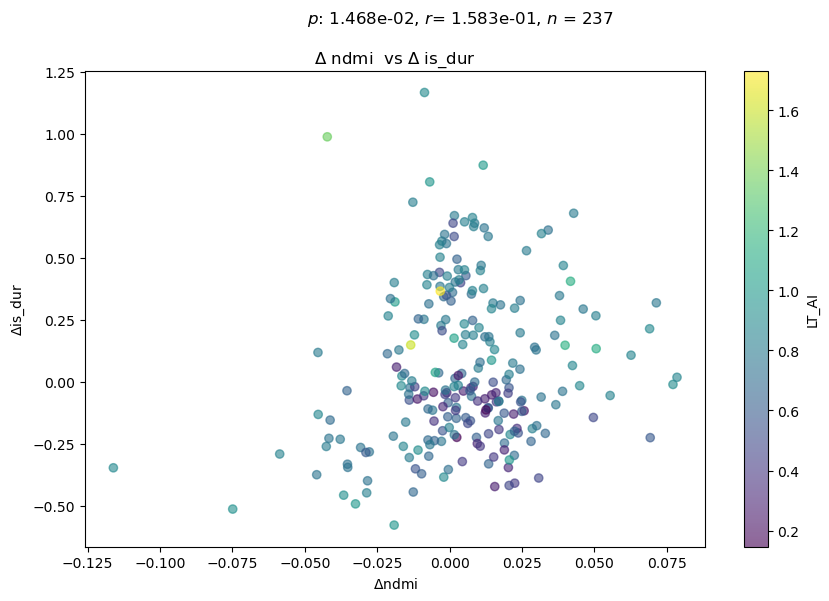

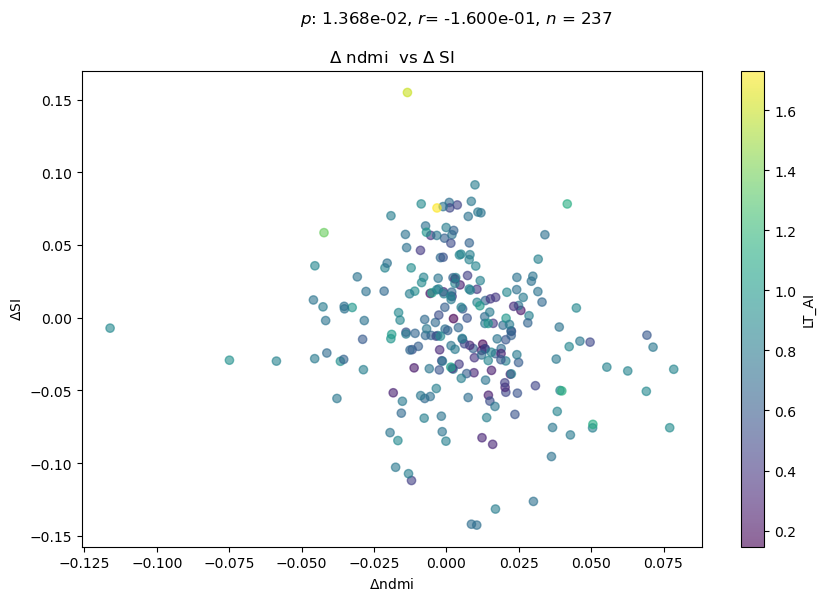

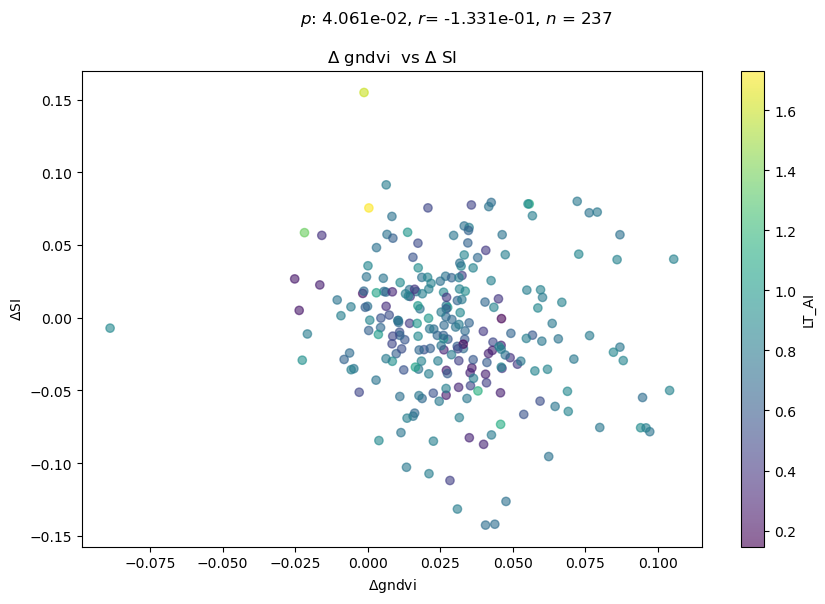

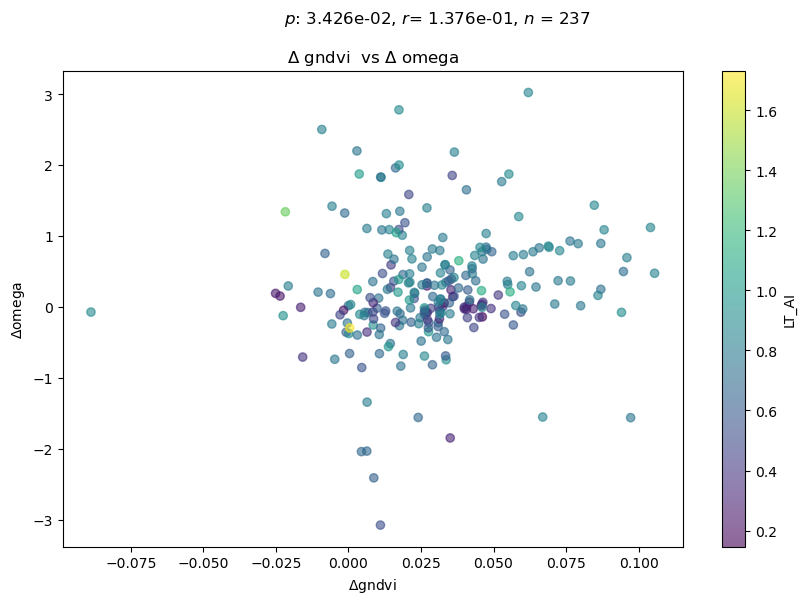

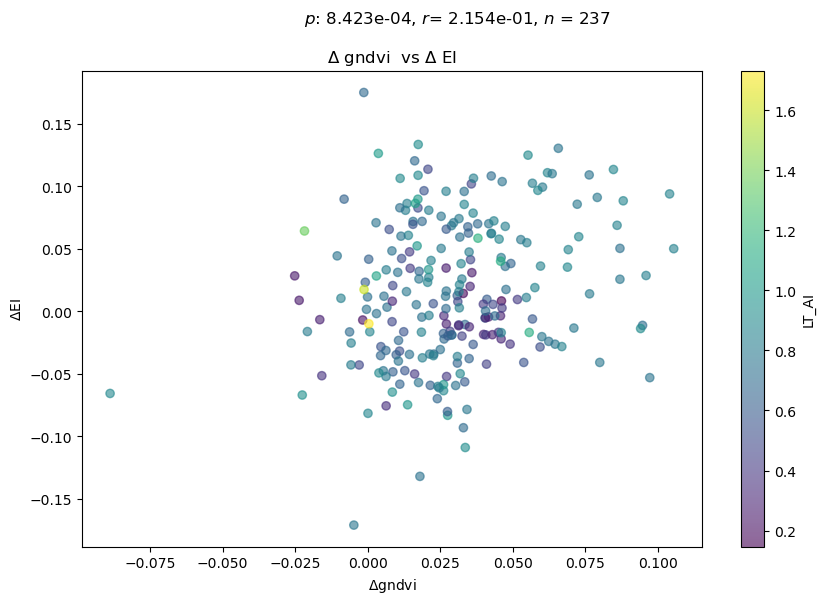

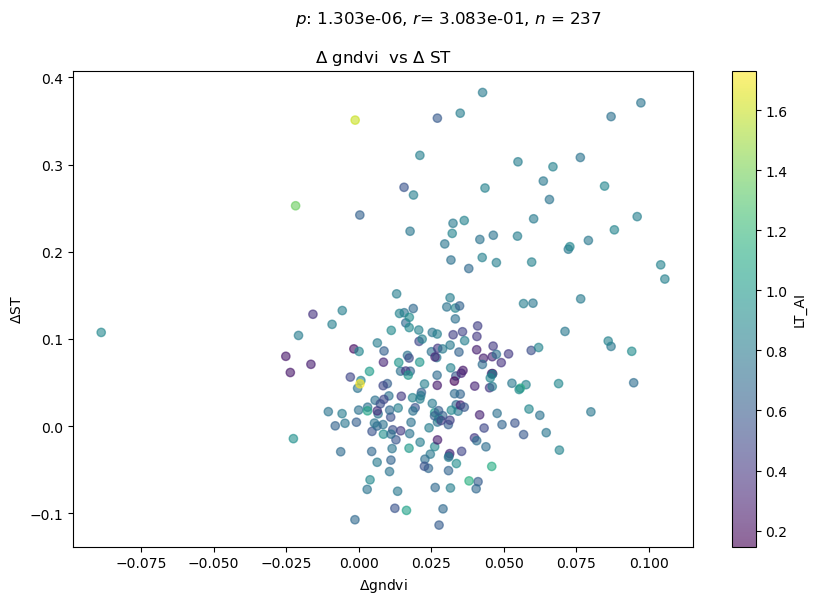

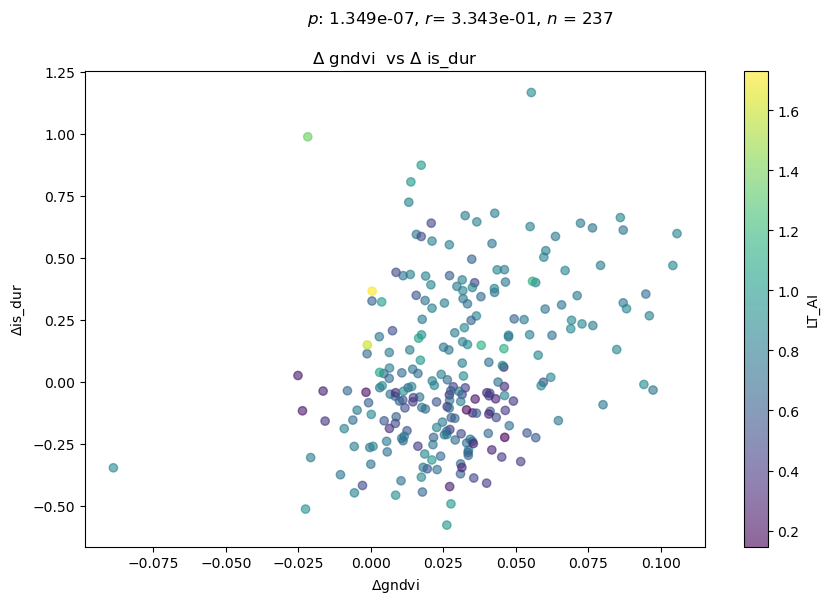

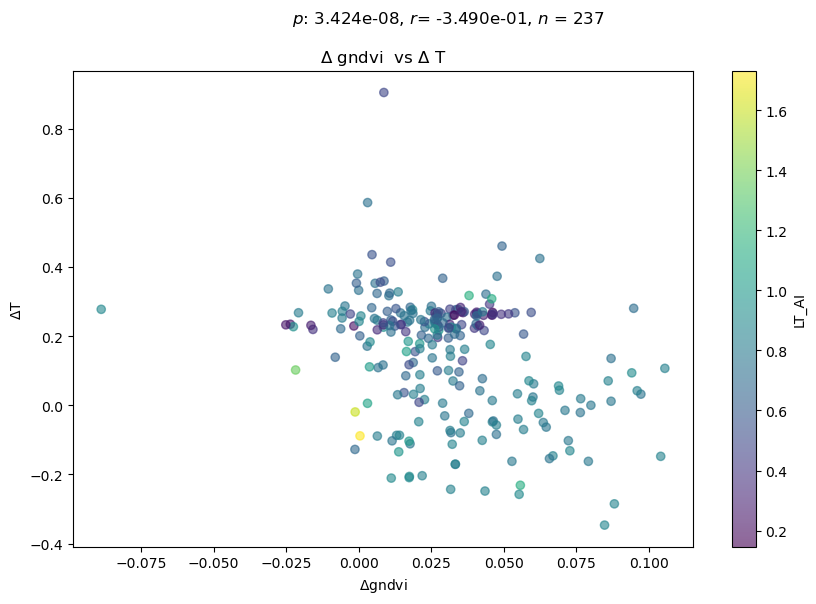

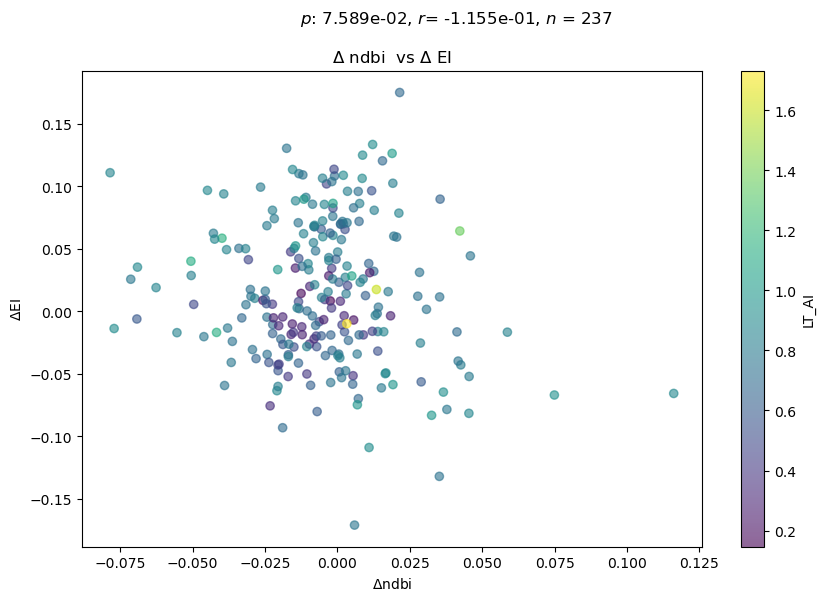

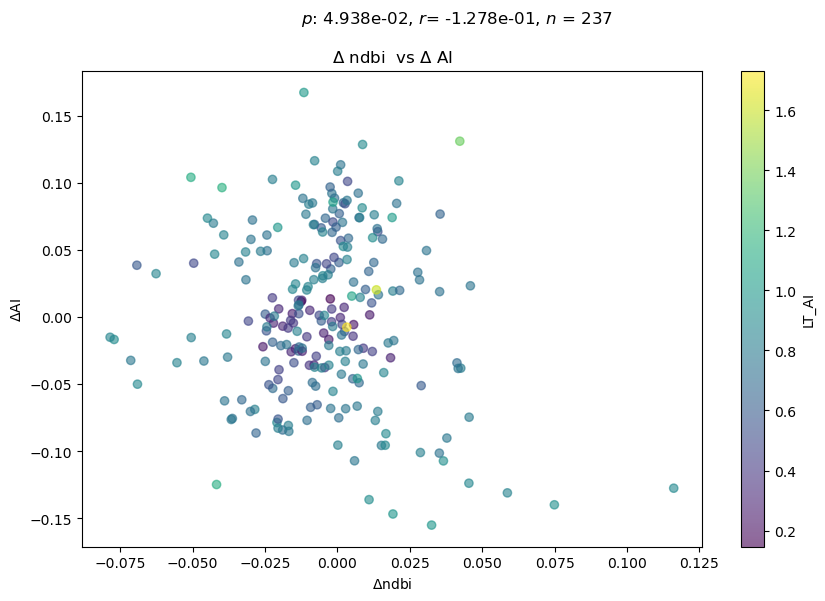

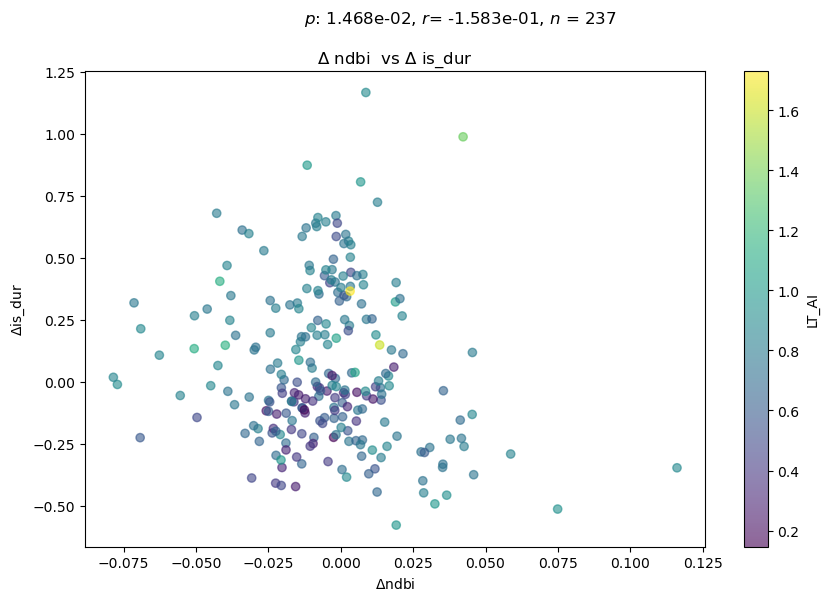

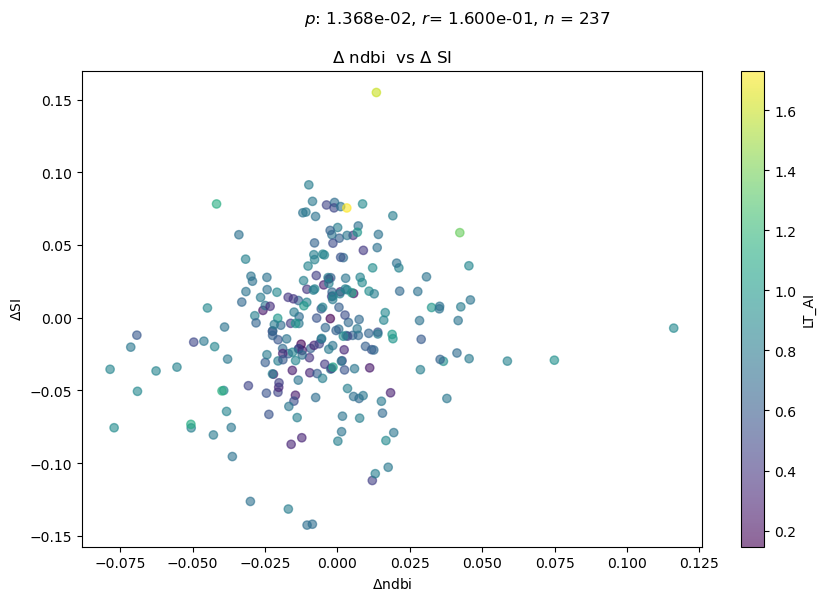

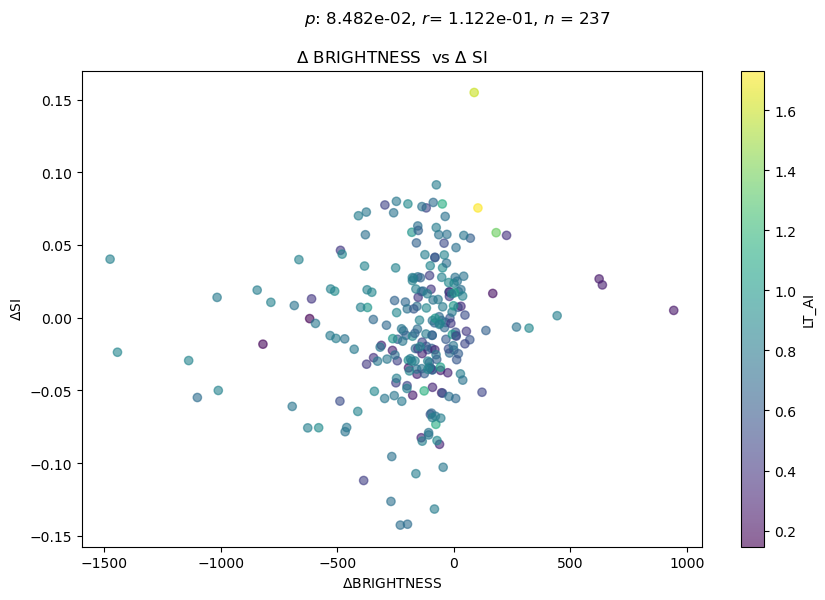

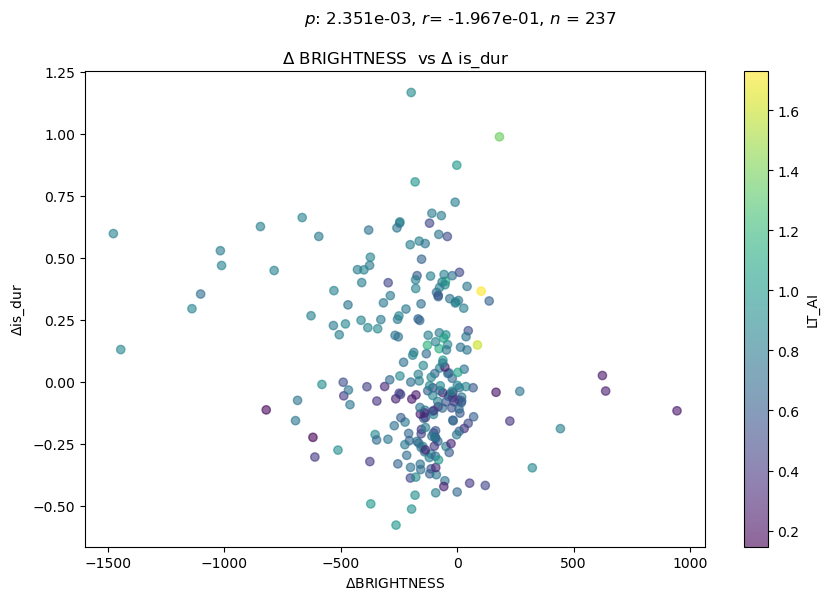

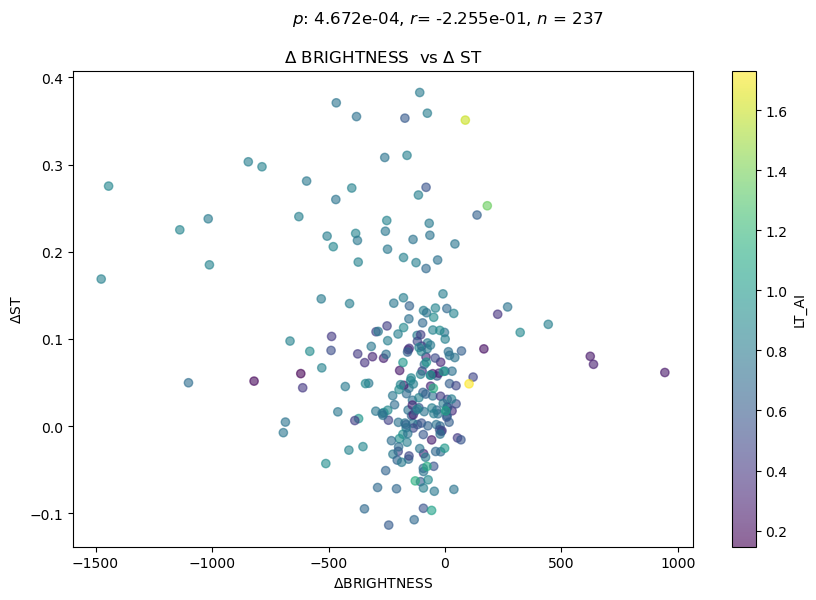

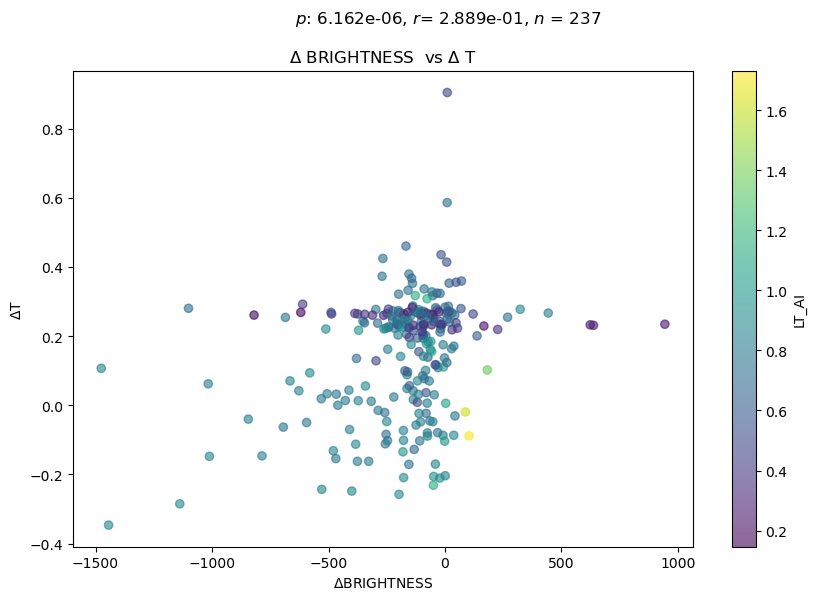

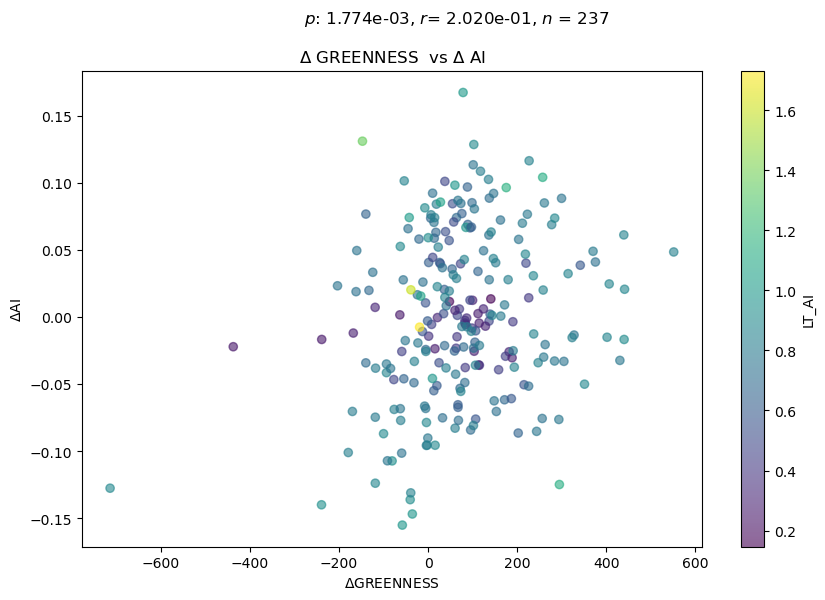

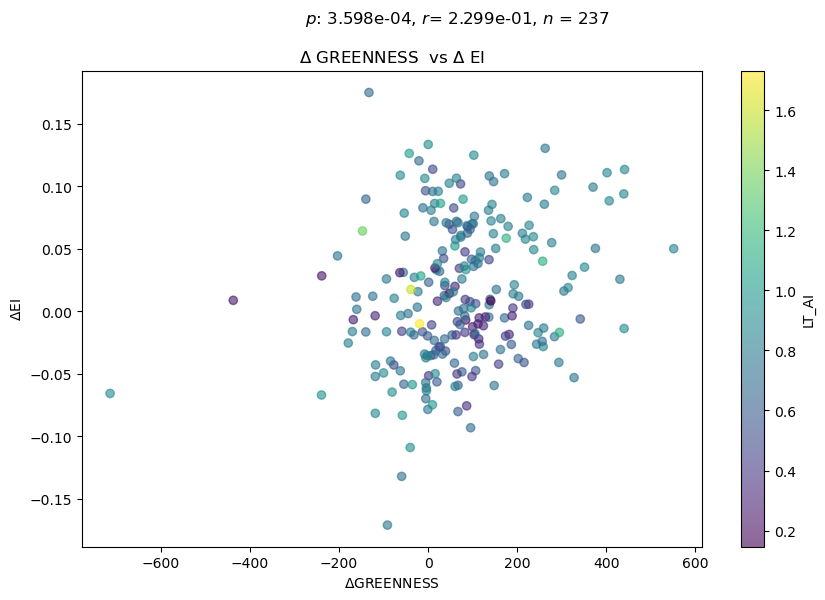

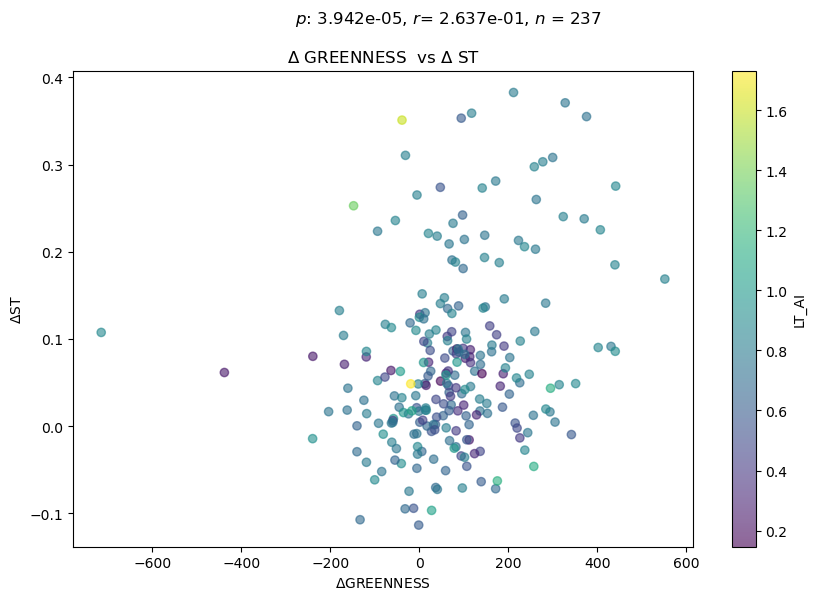

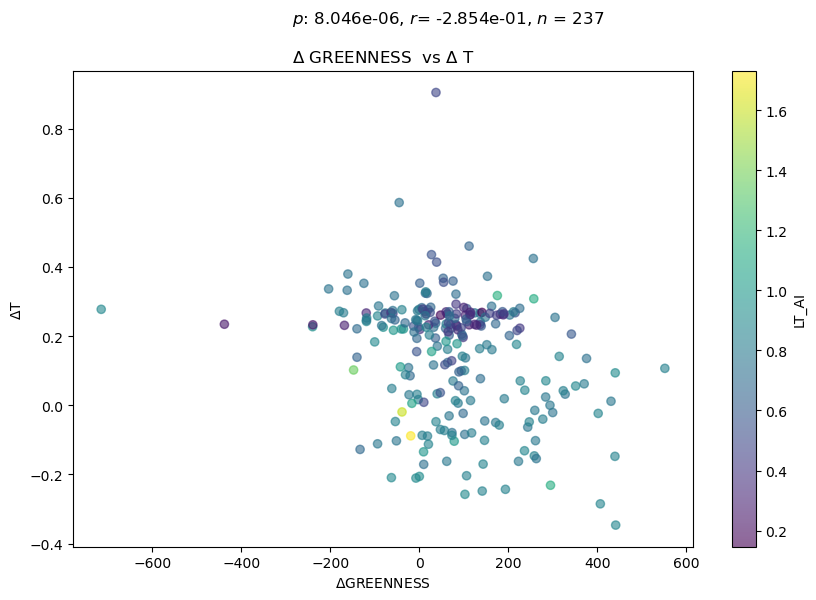

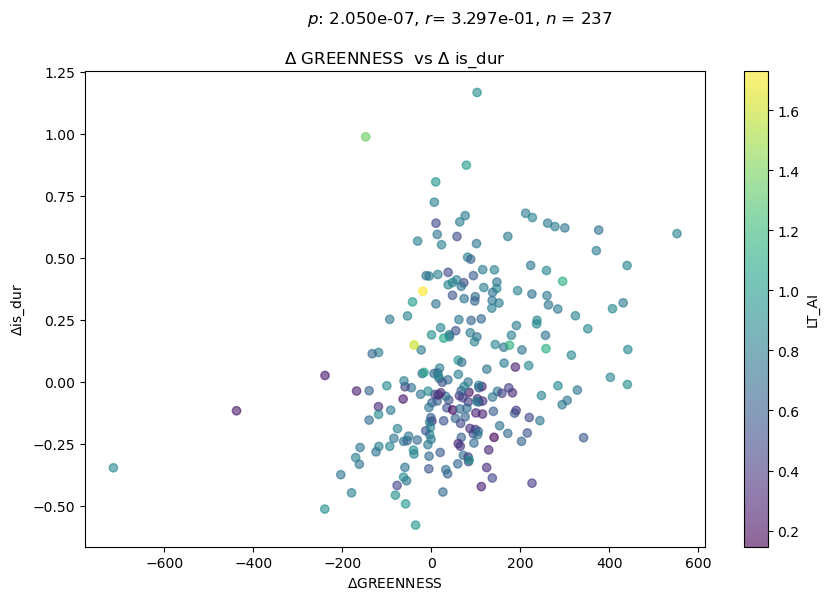

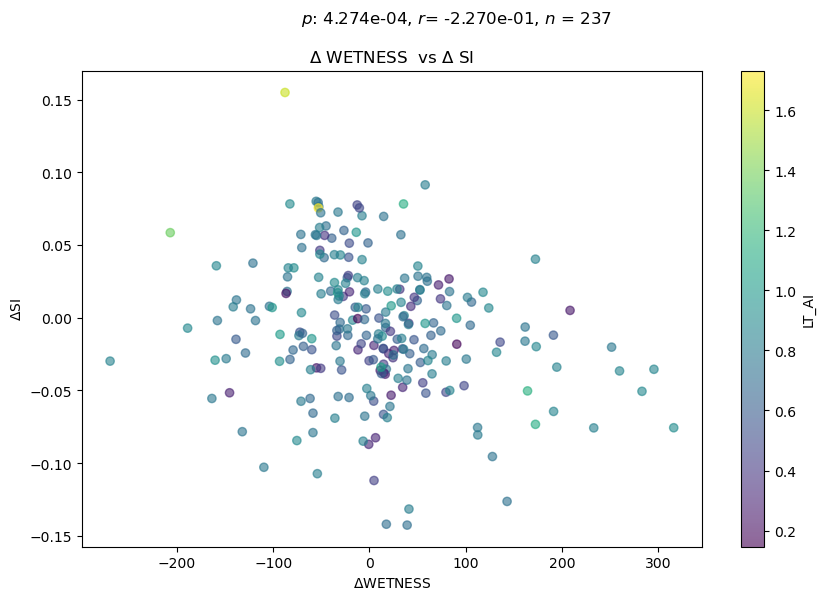

In [13]:
delta_years_levels = [1995, 1999, 2009, 2015]

delta_ranking = plot_descending_P(SR_indices, d_combo, sort_dp, d_r, SR_delta_exclude, delta=True, plot=True, savefig=True, color_by='LT_AI', levels = AI_levels)

In [14]:
df_ranked_delta = pd.DataFrame(delta_ranking, columns= ['SR_ind', 'WB_Clim_ind', 'prs_P', 'prs_R']).sort_values('prs_P')
df_ranked_delta.to_excel(f'outputs/SR_delta_correlations/ranking_delta_correlatons.xlsx')
df_ranked_delta

SR_ind WB_Clim_ind         prs_P     prs_R
20       d_gndvi         d_T  3.424052e-08 -0.348962
19       d_gndvi    d_is_dur  1.348645e-07  0.334323
33   d_GREENNESS    d_is_dur  2.050014e-07  0.329696
18       d_gndvi        d_ST  1.302789e-06  0.308288
28  d_BRIGHTNESS         d_T  6.161913e-06  0.288896
32   d_GREENNESS         d_T  8.046405e-06 -0.285419
31   d_GREENNESS        d_ST  3.941898e-05  0.263682
5         d_ndvi    d_is_dur  4.572550e-05  0.261554
4         d_ndvi         d_T  5.035324e-05 -0.260161
3         d_ndvi        d_ST  3.019763e-04  0.232728
30   d_GREENNESS        d_EI  3.597752e-04  0.229868
34     d_WETNESS        d_SI  4.273671e-04 -0.227022
27  d_BRIGHTNESS        d_ST  4.671932e-04 -0.225535
17       d_gndvi        d_EI  8.423113e-04  0.215446
10         d_nbr        d_SI  1.141205e-03 -0.210065
29   d_GREENNESS        d_AI  1.773672e-03  0.202008
26  d_BRIGHTNESS    d_is_dur  2.350620e-03 -0.196701
2         d_ndvi        d_SI  3.742488e-03 -0.187633
9          d_nbr    d_is_dur  3.907881e-03  0.186769
1         d_ndvi        d_EI  9.662918e-03  0.167781
14        d_ndmi        d_SI  1.368433e-02 -0.159961
24        d_ndbi        d_SI  1.368433e-02  0.159961
23        d_ndbi    d_is_dur  1.467744e-02 -0.158347
13        d_ndmi    d_is_dur  1.467744e-02  0.158347
8          d_nbr         d_T  2.136452e-02 -0.149447
16       d_gndvi     d_omega  3.425544e-02  0.137590
15       d_gndvi        d_SI  4.060725e-02 -0.133112
7          d_nbr        d_EI  4.247704e-02  0.131907
22        d_ndbi        d_AI  4.937900e-02 -0.127812
12        d_ndmi        d_AI  4.937900e-02  0.127812
11        d_ndmi        d_EI  7.589393e-02  0.115525
21        d_ndbi        d_EI  7.589393e-02 -0.115525
0         d_ndvi     d_omega  7.714207e-02  0.115039
25  d_BRIGHTNESS        d_SI  8.482013e-02  0.112185
6          d_nbr     d_omega  8.541377e-02  0.111973

# Grouping Delta Table by Aridity

 - first gather the aridity classes per index
 - Adapt the function of plotting the aridity classes as defined by nienke

In [15]:
combo

catchment_name           B4  decade_ending        AI  \
0               La Meuse Stenay   3505.870580           1995  0.723527   
1      La Vence la Francheville   3854.445260           1995  0.538129   
2              La Bar Cheveuges   3689.468405           1995  0.600242   
3    Le Loison Han-lÃ©s-Juvigny   3548.118212           1995  0.638256   
4         La Meuse Saint-Mihiel   3645.584904           1995  0.745344   
..                           ...          ...            ...       ...   
461                      3498500  3720.422102           2009  0.652670   
462                      6814000  3064.483575           2009  1.097098   
463                      6921070  3447.254681           2009  0.836939   
464                      8086290  2617.010094           2009  1.549649   
465                      3366500  3962.251251           2009  0.645260   

           EI           B7      ndbi     LT_EI          T        SI  ...  \
0    0.523830  1080.063217 -0.261393  0.491502   9.929822  0.130338  ...   
1    0.409847  1059.051313 -0.279797  0.454026   9.312353  0.222241  ...   
2    0.580658  1021.925823 -0.281666  0.584906   9.625349  0.190065  ...   
3    0.617702  1013.352084 -0.273264  0.606348   9.875898  0.181241  ...   
4    0.515176  1068.602832 -0.266628  0.537656   9.950750  0.125189  ...   
..        ...          ...       ...       ...        ...       ...  ...   
461  0.610182   758.044025 -0.365442  0.590612  12.701172  0.218926  ...   
462  0.870416  1299.125956 -0.120528  0.818152  11.421583  0.405217  ...   
463  0.753206  1127.520982 -0.199551  0.688914  13.515433  0.246029  ...   
464  0.956205  1768.761404  0.031569  0.947938  17.914717  0.356316  ...   
465  0.621181  1013.498651 -0.300549  0.631306  12.353685  0.122227  ...   

         ndmi    GREENNESS      WETNESS  Unnamed: 0          system_index  \
0    0.261393  1947.346107 -1101.055802           0  00000000000000000027   
1    0.279797  2283.432161 -1135.365148           1  0000000000000000001c   
2    0.281666  2146.471886 -1070.187065           2  00000000000000000023   
3    0.273264  2059.632583 -1075.027378           3  00000000000000000026   
4    0.266628  2109.174757 -1129.484224           4  00000000000000000028   
..        ...          ...          ...         ...                   ...   
461  0.365442  2361.124447  -773.772549         229  000000000000000000f8   
462  0.120528  1637.531815 -1570.136446         230  00000000000000000179   
463  0.199551  2010.817466 -1362.424560         231  0000000000000000018b   
464 -0.031569   899.262092 -2013.851057         232  000000000000000001c5   
465  0.300549  2490.857776 -1141.592110         233  000000000000000000eb   

          nbr    is_dur       LT_SR           B3  country_code  
0    0.535894  4.209709  136.127009   760.450265            FR  
1    0.570896  4.320080  185.448285   669.720762            FR  
2    0.571166  4.293069  267.844657   689.500991            FR  
3    0.561081  4.365462  259.431829   670.659755            FR  
4    0.549572  4.304854  161.677726   698.729876            FR  
..        ...       ...         ...          ...           ...  
461  0.666455  3.723684  234.503356   469.320062           USA  
462  0.404926  5.957845  311.800764   682.384961           USA  
463  0.506990  5.399113  267.042743   617.005689           USA  
464  0.199563  8.856678  459.384967  1112.382887           USA  
465  0.599997  4.252427  270.308308   530.598579           USA  

[466 rows x 30 columns]

In [16]:
labels=[f'{int(AI_levels[0])}-{int(AI_levels[1])}',
         f'{int(AI_levels[1])}-{int(AI_levels[2])}',
         f'{int(AI_levels[2])}-{int(AI_levels[3])}',
         f'{int(AI_levels[3])}-{int(AI_levels[4])}',
         f'{int(AI_levels[4])}-{int(AI_levels[5])}',
         f'{int(AI_levels[5])}-{int(AI_levels[6])}',
         f'{int(AI_levels[6])}-{int(AI_levels[7])}',
         f'{int(AI_levels[7])}-{int(AI_levels[8])}',
         f'{int(AI_levels[8])}-{int(AI_levels[9])}',]
print(labels)

['0-0', '0-0', '0-0', '0-1', '1-1', '1-1', '1-1', '1-1', '1-2']


In [17]:
combo

catchment_name           B4  decade_ending        AI  \
0               La Meuse Stenay   3505.870580           1995  0.723527   
1      La Vence la Francheville   3854.445260           1995  0.538129   
2              La Bar Cheveuges   3689.468405           1995  0.600242   
3    Le Loison Han-lÃ©s-Juvigny   3548.118212           1995  0.638256   
4         La Meuse Saint-Mihiel   3645.584904           1995  0.745344   
..                           ...          ...            ...       ...   
461                      3498500  3720.422102           2009  0.652670   
462                      6814000  3064.483575           2009  1.097098   
463                      6921070  3447.254681           2009  0.836939   
464                      8086290  2617.010094           2009  1.549649   
465                      3366500  3962.251251           2009  0.645260   

           EI           B7      ndbi     LT_EI          T        SI  ...  \
0    0.523830  1080.063217 -0.261393  0.491502   9.929822  0.130338  ...   
1    0.409847  1059.051313 -0.279797  0.454026   9.312353  0.222241  ...   
2    0.580658  1021.925823 -0.281666  0.584906   9.625349  0.190065  ...   
3    0.617702  1013.352084 -0.273264  0.606348   9.875898  0.181241  ...   
4    0.515176  1068.602832 -0.266628  0.537656   9.950750  0.125189  ...   
..        ...          ...       ...       ...        ...       ...  ...   
461  0.610182   758.044025 -0.365442  0.590612  12.701172  0.218926  ...   
462  0.870416  1299.125956 -0.120528  0.818152  11.421583  0.405217  ...   
463  0.753206  1127.520982 -0.199551  0.688914  13.515433  0.246029  ...   
464  0.956205  1768.761404  0.031569  0.947938  17.914717  0.356316  ...   
465  0.621181  1013.498651 -0.300549  0.631306  12.353685  0.122227  ...   

         ndmi    GREENNESS      WETNESS  Unnamed: 0          system_index  \
0    0.261393  1947.346107 -1101.055802           0  00000000000000000027   
1    0.279797  2283.432161 -1135.365148           1  0000000000000000001c   
2    0.281666  2146.471886 -1070.187065           2  00000000000000000023   
3    0.273264  2059.632583 -1075.027378           3  00000000000000000026   
4    0.266628  2109.174757 -1129.484224           4  00000000000000000028   
..        ...          ...          ...         ...                   ...   
461  0.365442  2361.124447  -773.772549         229  000000000000000000f8   
462  0.120528  1637.531815 -1570.136446         230  00000000000000000179   
463  0.199551  2010.817466 -1362.424560         231  0000000000000000018b   
464 -0.031569   899.262092 -2013.851057         232  000000000000000001c5   
465  0.300549  2490.857776 -1141.592110         233  000000000000000000eb   

          nbr    is_dur       LT_SR           B3  country_code  
0    0.535894  4.209709  136.127009   760.450265            FR  
1    0.570896  4.320080  185.448285   669.720762            FR  
2    0.571166  4.293069  267.844657   689.500991            FR  
3    0.561081  4.365462  259.431829   670.659755            FR  
4    0.549572  4.304854  161.677726   698.729876            FR  
..        ...       ...         ...          ...           ...  
461  0.666455  3.723684  234.503356   469.320062           USA  
462  0.404926  5.957845  311.800764   682.384961           USA  
463  0.506990  5.399113  267.042743   617.005689           USA  
464  0.199563  8.856678  459.384967  1112.382887           USA  
465  0.599997  4.252427  270.308308   530.598579           USA  

[466 rows x 30 columns]

Group: 0.2-0.4, indice: 44
Group: 0.4-0.6, indice: 73
Group: 0.6-0.8, indice: 187
Group: 0.8-1.0, indice: 138
Group: 1.0-1.2, indice: 14
Group: 1.2-1.4, indice: 2
Group: 1.4-1.6, indice: 0
Group: 1.6-1.8, indice: 4
Group: 1.8-2.0, indice: 0


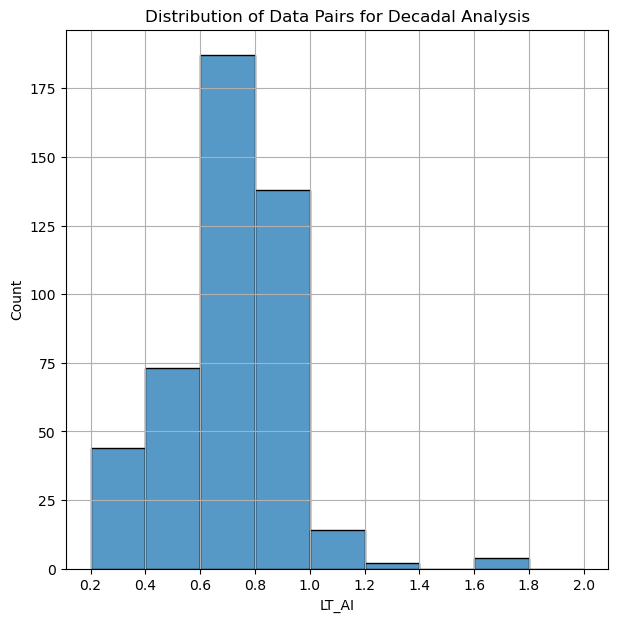

In [18]:
aridity_table1 = combo.set_index('system_index').sort_values('LT_AI')
aridity_table1['AI_group_narrow'] = pd.cut(aridity_table1['LT_AI'], AI_levels, labels=[f'{float(AI_levels[0])}-{float(AI_levels[1])}',
                                                                                     f'{float(AI_levels[1])}-{float(AI_levels[2])}',
                                                                                     f'{float(AI_levels[2])}-{float(AI_levels[3])}',
                                                                                     f'{float(AI_levels[3])}-{float(AI_levels[4])}',
                                                                                     f'{float(AI_levels[4])}-{float(AI_levels[5])}',
                                                                                     f'{float(AI_levels[5])}-{float(AI_levels[6])}',
                                                                                     f'{float(AI_levels[6])}-{float(AI_levels[7])}',
                                                                                     f'{float(AI_levels[7])}-{float(AI_levels[8])}',
                                                                                     f'{float(AI_levels[8])}-{float(AI_levels[9])}',], ordered=True)
grouped1 = aridity_table1.groupby('AI_group_narrow')

dist = []

for group, indices in grouped1.indices.items():
    
    print(f"Group: {group}, indice: {len(indices)}")
    dist.append(len(indices))

colors5 = ['#009B77', '#6CC24A','#FFB81C', '#EC6842', '#A50034']

#222222
fig = plt.figure(figsize=(7, 7))
sns.histplot(aridity_table1.LT_AI, bins=AI_levels)
plt.xticks(AI_levels)
plt.grid()
plt.title('Distribution of Data Pairs for Decadal Analysis');

In [19]:
def w_function(AI, w):
    EI = 1 + AI - (1 + (AI**w))**(1/w)
    return EI

In [20]:
plt.figure(99)
def many_w_curves():
    for i, (group, indices) in enumerate(grouped1):
        ls_EI = []
        ls_AI = []
        if i <=4:
            AI = np.linspace(AI_levels[i], AI_levels[i+1], 150)
            w = grouped1.mean()['omega'][i]
            EI_curve = w_function(AI, w)
            plt.plot(AI, EI_curve, linewidth=2, c=colors5[i], label=f'mean $\omega$ ={w:.3f}, AI: {group}')
            ls_EI.append(EI_curve)
            ls_AI.append(AI)
         
        else:
            break
    return [ls_EI, ls_AI]

#def fill_between_curves():

<Figure size 640x480 with 0 Axes>

Group: 0.2-0.4, indice: 22
Group: 0.4-0.6, indice: 37
Group: 0.6-0.8, indice: 97
Group: 0.8-1.0, indice: 69
Group: 1.0-1.2, indice: 7
Group: 1.2-1.4, indice: 1
Group: 1.4-1.6, indice: 0
Group: 1.6-1.8, indice: 2
Group: 1.8-2.0, indice: 0


C:\Users\creeb\AppData\Local\Temp\ipykernel_42804\1105719350.py:24: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(aridity_table.LT_AI, bins=AI_levels, palette=colors5)


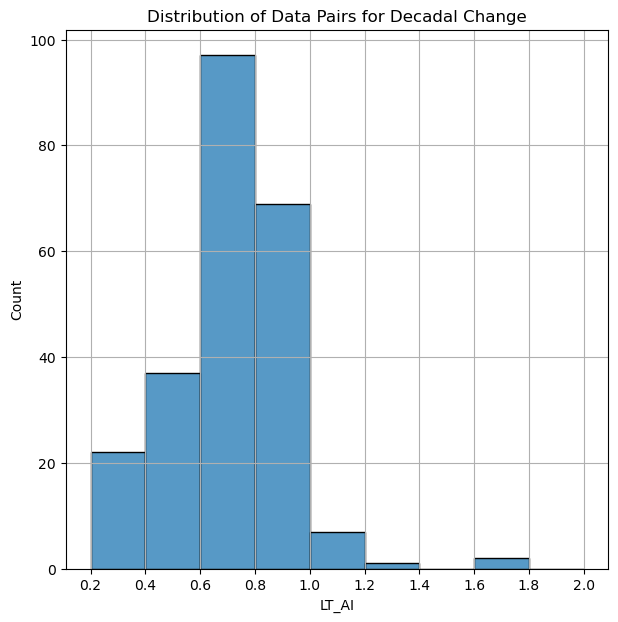

In [21]:
aridity_table = d_combo.set_index('system_index').sort_values('LT_AI')
aridity_table['AI_group_narrow'] = pd.cut(aridity_table['LT_AI'], AI_levels, labels=[f'{float(AI_levels[0])}-{float(AI_levels[1])}',
                                                                                     f'{float(AI_levels[1])}-{float(AI_levels[2])}',
                                                                                     f'{float(AI_levels[2])}-{float(AI_levels[3])}',
                                                                                     f'{float(AI_levels[3])}-{float(AI_levels[4])}',
                                                                                     f'{float(AI_levels[4])}-{float(AI_levels[5])}',
                                                                                     f'{float(AI_levels[5])}-{float(AI_levels[6])}',
                                                                                     f'{float(AI_levels[6])}-{float(AI_levels[7])}',
                                                                                     f'{float(AI_levels[7])}-{float(AI_levels[8])}',
                                                                                     f'{float(AI_levels[8])}-{float(AI_levels[9])}',], ordered=True)
grouped = aridity_table.groupby('AI_group_narrow')

dist = []

for group, indices in grouped.indices.items():
    
    print(f"Group: {group}, indice: {len(indices)}")
    dist.append(len(indices))

colors5 = ['#009B77', '#6CC24A','#FFB81C', '#EC6842', '#A50034']

#222222
fig = plt.figure(figsize=(7, 7))
sns.histplot(aridity_table.LT_AI, bins=AI_levels, palette=colors5)
plt.xticks(AI_levels)
plt.grid()
plt.title('Distribution of Data Pairs for Decadal Change');

In [22]:
combo

catchment_name           B4  decade_ending        AI  \
0               La Meuse Stenay   3505.870580           1995  0.723527   
1      La Vence la Francheville   3854.445260           1995  0.538129   
2              La Bar Cheveuges   3689.468405           1995  0.600242   
3    Le Loison Han-lÃ©s-Juvigny   3548.118212           1995  0.638256   
4         La Meuse Saint-Mihiel   3645.584904           1995  0.745344   
..                           ...          ...            ...       ...   
461                      3498500  3720.422102           2009  0.652670   
462                      6814000  3064.483575           2009  1.097098   
463                      6921070  3447.254681           2009  0.836939   
464                      8086290  2617.010094           2009  1.549649   
465                      3366500  3962.251251           2009  0.645260   

           EI           B7      ndbi     LT_EI          T        SI  ...  \
0    0.523830  1080.063217 -0.261393  0.491502   9.929822  0.130338  ...   
1    0.409847  1059.051313 -0.279797  0.454026   9.312353  0.222241  ...   
2    0.580658  1021.925823 -0.281666  0.584906   9.625349  0.190065  ...   
3    0.617702  1013.352084 -0.273264  0.606348   9.875898  0.181241  ...   
4    0.515176  1068.602832 -0.266628  0.537656   9.950750  0.125189  ...   
..        ...          ...       ...       ...        ...       ...  ...   
461  0.610182   758.044025 -0.365442  0.590612  12.701172  0.218926  ...   
462  0.870416  1299.125956 -0.120528  0.818152  11.421583  0.405217  ...   
463  0.753206  1127.520982 -0.199551  0.688914  13.515433  0.246029  ...   
464  0.956205  1768.761404  0.031569  0.947938  17.914717  0.356316  ...   
465  0.621181  1013.498651 -0.300549  0.631306  12.353685  0.122227  ...   

         ndmi    GREENNESS      WETNESS  Unnamed: 0          system_index  \
0    0.261393  1947.346107 -1101.055802           0  00000000000000000027   
1    0.279797  2283.432161 -1135.365148           1  0000000000000000001c   
2    0.281666  2146.471886 -1070.187065           2  00000000000000000023   
3    0.273264  2059.632583 -1075.027378           3  00000000000000000026   
4    0.266628  2109.174757 -1129.484224           4  00000000000000000028   
..        ...          ...          ...         ...                   ...   
461  0.365442  2361.124447  -773.772549         229  000000000000000000f8   
462  0.120528  1637.531815 -1570.136446         230  00000000000000000179   
463  0.199551  2010.817466 -1362.424560         231  0000000000000000018b   
464 -0.031569   899.262092 -2013.851057         232  000000000000000001c5   
465  0.300549  2490.857776 -1141.592110         233  000000000000000000eb   

          nbr    is_dur       LT_SR           B3  country_code  
0    0.535894  4.209709  136.127009   760.450265            FR  
1    0.570896  4.320080  185.448285   669.720762            FR  
2    0.571166  4.293069  267.844657   689.500991            FR  
3    0.561081  4.365462  259.431829   670.659755            FR  
4    0.549572  4.304854  161.677726   698.729876            FR  
..        ...       ...         ...          ...           ...  
461  0.666455  3.723684  234.503356   469.320062           USA  
462  0.404926  5.957845  311.800764   682.384961           USA  
463  0.506990  5.399113  267.042743   617.005689           USA  
464  0.199563  8.856678  459.384967  1112.382887           USA  
465  0.599997  4.252427  270.308308   530.598579           USA  

[466 rows x 30 columns]

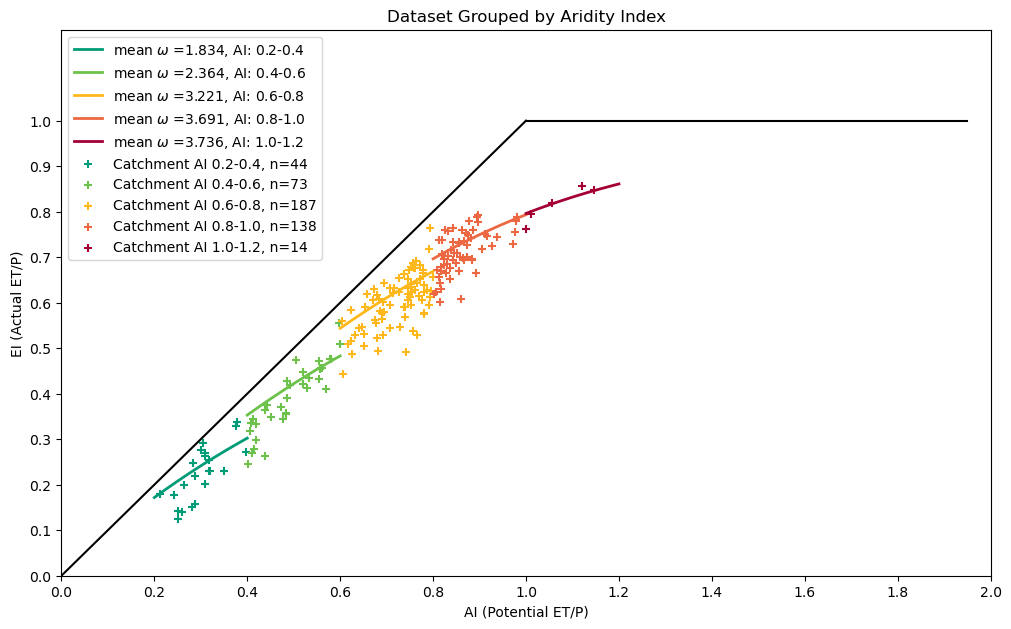

In [23]:
from matplotlib.colors import ListedColormap
from itertools  import chain

colors5 = ['#009B77', '#6CC24A','#FFB81C', '#EC6842', '#A50034']
colors9 = ['#FFFFFF','#009B77', '#6CC24A','#FFB81C', '#EC6842', '#A50034', '#222222', '#222222', '#222222']

budyko_curve_x = np.arange(1, 2, 0.05)
energy_limit_x = np.arange(0, 1.0001, 0.05)
x = np.arange(0, 1.0001, 0.05)
water_limit_y = 1 + budyko_curve_x*0
energy_limit_y = energy_limit_x
y = 1 + x*0

levels = [0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]

fig, ax = plt.subplots(1, constrained_layout=True, figsize=(10,6.18))

plt.ylabel("EI (Actual ET/P)")
plt.xlabel("AI (Potential ET/P)")

plt.xlim(0,2)
plt.ylim(0, 1.2)

plt.plot(energy_limit_x, energy_limit_y, c='k')
plt.plot(budyko_curve_x, water_limit_y,c='k')
plt.plot()

plt.yticks([0,0.1,0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.xticks([0,0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0]);

ls_EI, ls_AI = many_w_curves()

combo = combo.drop_duplicates(subset='system_index', keep='first')

for i in range(len(colors5)):
    mask = (combo['LT_AI'] >= AI_levels[i]) & (combo['LT_AI'] <= AI_levels[i+1])
    masked = combo[mask]
    scatter1 = ax.scatter(masked.LT_AI, masked.LT_EI, c = colors5[i], label=f'Catchment AI {list(grouped1.groups.keys())[i]}, n={len(list(grouped1.groups.values())[i])}', marker='+')

#cbar.set_ticks(AI_levels)
#cbar.set_ticklabels(colors9)

plt.title('Dataset Grouped by Aridity Index')

plt.legend()



In [24]:
ls_EI

[]

In [25]:
import pandas as pd

# Create a sample dataframe
df = pd.DataFrame({'A': [1, 2, 3, 4, 5],
                   'B': [10, 20, 30, 40, 50]})

# Specify the lower and upper levels for the indexing
lower_level = 2
upper_level = 4

# Create a boolean mask that selects rows where the value of 'A' is between the lower and upper levels
mask = (df['A'] >= lower_level) & (df['A'] <= upper_level)

# Use the boolean mask to index the dataframe
result = df[mask]

print(result)

   A   B
1  2  20
2  3  30
3  4  40


NameError: name 'indice' is not defined

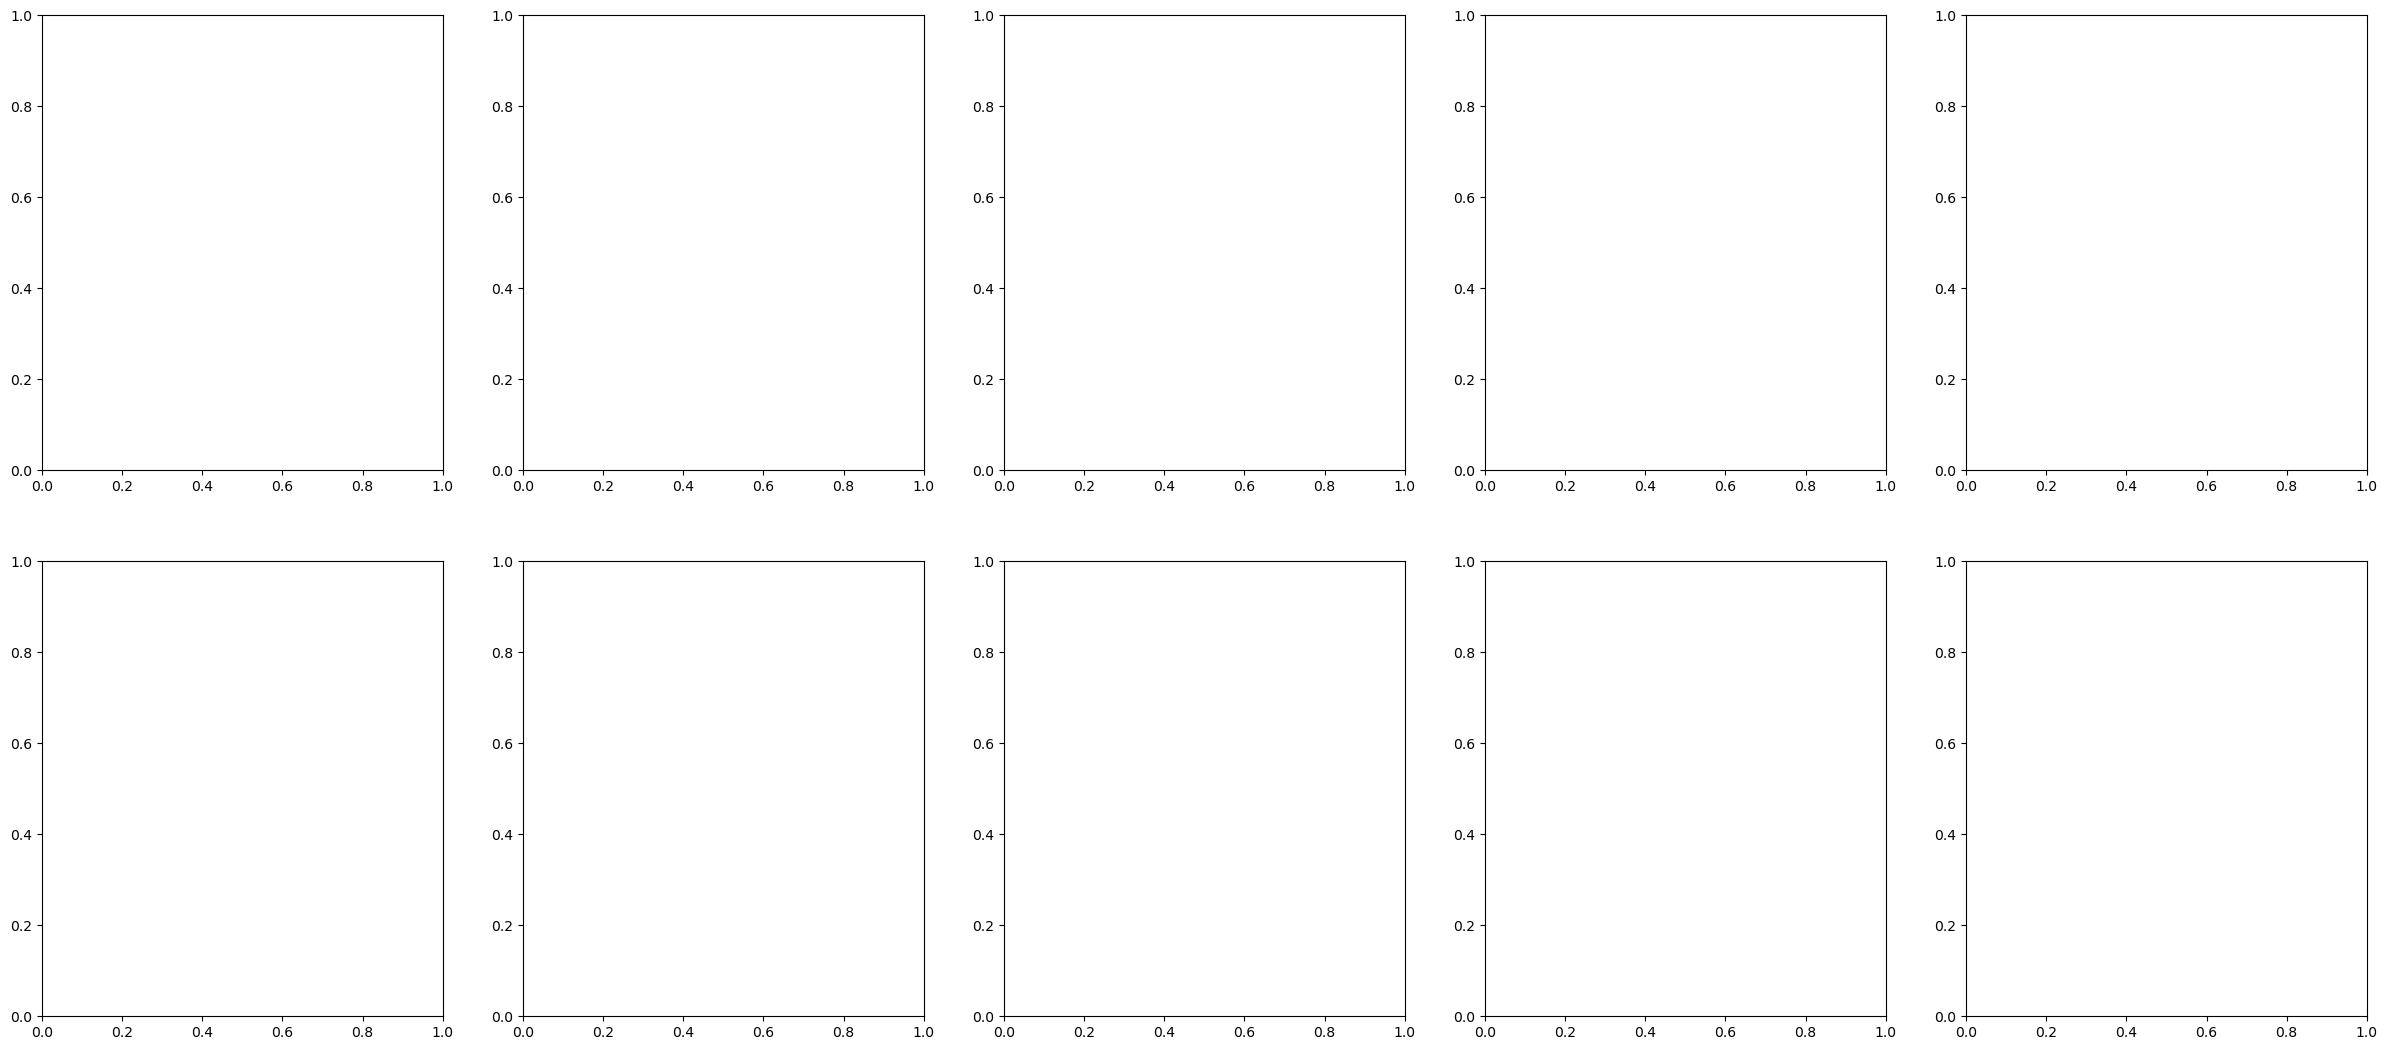

In [26]:
fig, ax = plt.subplots(2, 5, figsize=(30, 13))

n = []

index = np.arange(0, 6)


for i, (group, data) in enumerate(grouped):
    #if group is not None:
    #    print(data)
    #    break
    
    lim = np.max(abs(aridity_table.iloc[int(indice[0]):int(indice[-1])].loc[:, 'd_EI']))
    
    
    if len(data) >0 and lim <1 and i <5:  
        n=0
        
        x1 = data.d_EI
        #x1.plot.hist(ax=ax[n,i], alpha=0.5, label=group, color='lime')#, sharey=True)
        sns.histplot(y=x1, ax=ax[0,i], color = colors5[i], orientation='horizontal')
        #x = aridity_table.iloc[int(indice[0]):int(indice[-1])].loc[:, 'd_EI']
        
        mu = np.mean(x1)
        
        p10 = np.percentile(x1, 10)
        
        p90 = np.percentile(x1, 90)
        
        #x.plot.hist(alpha=0.5)#, label=f'{group}, n= {len(indice)}', edgecolor='black', linewidth=1.2, ax=ax1)
        
        ax[0,i].set_ylabel(f'$\Delta$ EI')
        ax[0,i].set_title(f'AI {group} \n (n={len(data)})')
        #ax.axvline(np.mean(aridity_table.iloc[int(indice[0]):int(indice[-1])].loc[:, 'LT_EI']))
        #plt.grid(visible=True, alpha=0.5)
        ax[0,i].axhline(mu, c='r', label=f'$\mu$: {mu:.3f}')
        ax[0,i].axhline(p10, c='r', ls='--', label=f'$p0.1$: {p10:.3f}')
        ax[0,i].axhline(p90, c='r', ls='--', label=f'$p0.9$: {p90:.3f}')
        ax[0,i].set_ylim(-lim*3, lim*3)
        ax[0,i].set_xlim(0, 25)
        ax[0,i].grid()
        ax[0,i].legend(loc='upper left')
        
    
    lim = np.max(abs(aridity_table.iloc[int(indice[0]):int(indice[-1])].loc[:, 'd_EI']))
    
    if len(data) >0 and lim <1 and i <5:  
        n=2
        #ax[1,i].add_subplot(sharey=True)
        x1 = data.d_AI
        #x1.plot.hist(ax=ax[n,i], alpha=0.5, label=group)#, sharey=True)
        sns.histplot(x=x1, ax=ax[1, i], color = colors5[i])
        #x = aridity_table.iloc[int(indice[0]):int(indice[-1])].loc[:, 'd_EI']
        
        mu = np.mean(x1)
        
        p10 = np.percentile(x1, 10)
        
        p90 = np.percentile(x1, 90)
        
        ax[1,i].set_xlabel(f'$\Delta$ AI')
        #ax[n,i].set_title(f'EI {group}')
        #ax.axvline(np.mean(aridity_table.iloc[int(indice[0]):int(indice[-1])].loc[:, 'LT_EI']))
        #plt.grid(visible=True, alpha=0.5)
        #ax[1,i].set_title(f'AI {group} \n (n={len(data)})')
        ax[1,i].axvline(mu, c='r', label=f'$\mu$: {mu:.3f}')
        ax[1,i].axvline(p10, c='r', ls='--', label=f'$p0.1$: {p10:.3f}')
        ax[1,i].axvline(p90, c='r', ls='--', label=f'$p0.9$: {p90:.3f}')
        ax[1,i].set_xlim(-lim*3, lim*3)
        ax[1,i].set_ylim(0, 19)
        ax[1,i].grid()
        ax[1,i].legend(loc='upper left')
    
    
    
    gp +=1
        
    


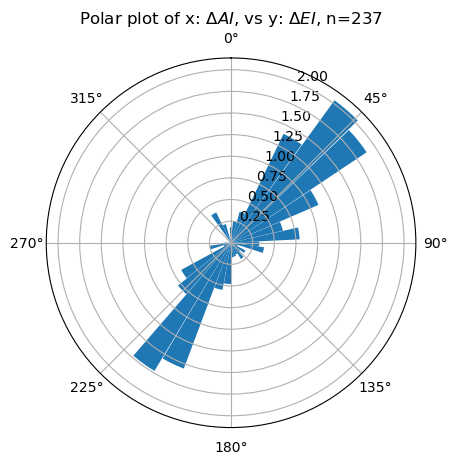

In [219]:
df = d_combo

# Get the angle and magnitude of each data point
angles = np.arctan2(df['d_EI'], df['d_AI'])
magnitudes = np.sqrt(df['d_AI']**2 + df['d_EI']**2)

# Create bins for the angles
bins = np.linspace(-np.pi, np.pi, num=36)

# Create a histogram of the angles
hist, _ = np.histogram(angles, bins=bins, weights=magnitudes)

# Plot the rose diagram
ax = plt.subplot(projection='polar')
ax.bar(bins[:-1], hist, width=2*np.pi/36, align='edge', bottom=0)
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_title(f"Polar plot of x: $\Delta AI$, vs y: $\Delta EI$, n={len(d_combo)}")
plt.show()

## Plotting polar distributions of movement within the budyko framework

magnitude = v = √((x2 – x1)^2 + (y2 – y1)^2)

direction and magnitude of movement within the framework

index [1 2 3 4 5]
[0.03060333 0.         0.01368946 0.15812278 0.01586114 0.
 0.         0.10572649 0.07564751 0.         0.0103939  0.01300978
 0.         0.01755858 0.00800247 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.02058919 0.03100826 0.00814686 0.         0.         0.07493858
 0.         0.         0.02384649 0.         0.        ]
[0.         0.         0.06635177 0.29472811 0.19727406 0.01958788
 0.01215064 0.09008309 0.         0.00836892 0.         0.
 0.         0.         0.11994675 0.         0.03908091 0.
 0.14370861 0.0154171  0.01475135 0.20043705 0.19899177 0.
 0.23157271 0.17448064 0.08919499 0.         0.         0.
 0.         0.00444206 0.01202198 0.03887508 0.        ]
[0.11093523 0.27559882 0.46159389 0.6001002  0.51684109 0.49136259
 0.07399387 0.05474179 0.         0.         0.         0.
 0.         0.         0.26227286 0.22341057 0.         0.17672029
 0.10428005 0.03546643 0.52430876 1.03364028 0.93999682 0.183

IndexError: index 5 is out of bounds for axis 0 with size 5

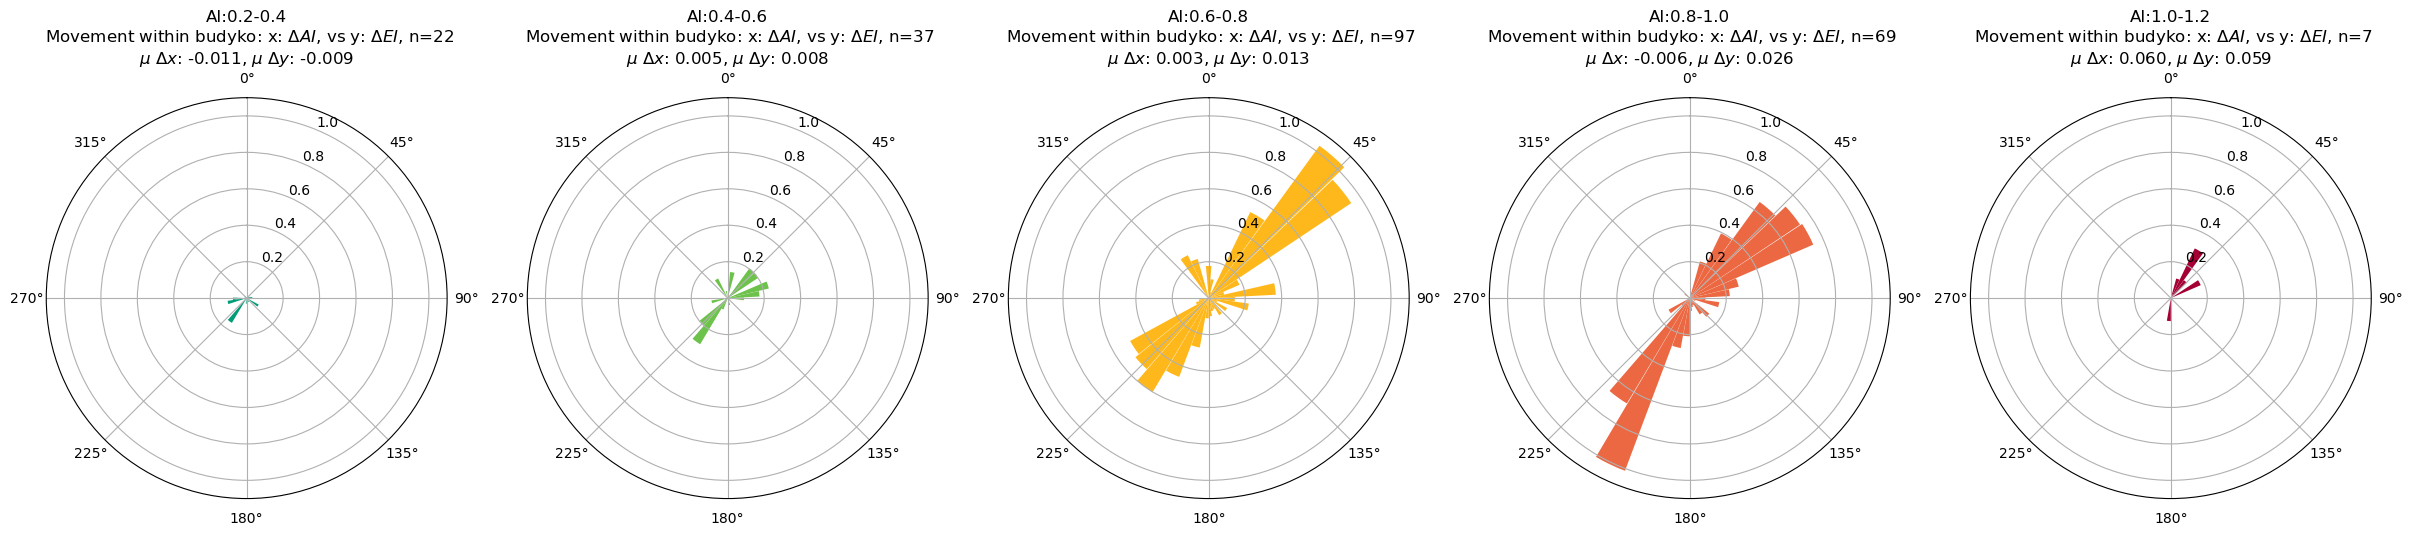

In [220]:

fig, ax = plt.subplots(1, 5, figsize=(30, 7.5))
n=0
index = np.arange(1, 6)
print('index',index)

for i, (group, df) in enumerate(grouped):
    if n <=5:
    
        y= df['d_EI']
        x=df['d_AI']

        mu_x = np.mean(x)
        mu_y = np.mean(y)

        # Get the angle and magnitude of each data point
        angles = np.arctan2(y,x)
        magnitudes = np.sqrt(x**2 + y**2)

        # Create bins for the angles
        bins = np.linspace(-np.pi, np.pi, num=36)

        # Create a histogram of the angles
        hist, _ = np.histogram(angles, bins=bins, weights=magnitudes)
        
        print(hist)
        
        # Plot the rose diagram
        ax = plt.subplot(1,5,index[n], projection='polar')
        ax.bar(bins[:-1], hist, width=2*np.pi/36, align='edge', bottom=0, color=colors5[n])
        ax.set_ylim(0, 1.1)
        ax.set_theta_zero_location("N")
        ax.set_theta_direction(-1)
        #ax.suptitle(f'AI group: {group}')
        ax.set_title(f"AI:{group}\n Movement within budyko: x: $\Delta AI$, vs y: $\Delta EI$, n={len(df)}\n$\mu$ $\Delta x$: {mu_x:.3f}, $\mu$ $\Delta y$: {mu_y:.3f}")
        n+=1
    else:
        break

What can we say about SR vs Tendencies in EI per AI

In [ ]:
#ranking = plot_descending_P(SR_indices, combo, sort_p, prs_r, SR_exclude, delta=False, plot=True, savefig=True, color_by='LT_AI', levels = AI_levels)


for i, (group, data) in enumerate(grouped):
    print(group)
    df = data
    display(df.corr())

# Corine Land Classes




In [ ]:
meuse_sysind = meuse.system_index.to_list()
classes = pd.read_excel('meuse/CORINE/land_cover_classes.xlsx')

periods = [1990, 2000, 2006, 2012, 2018]

len(meuse_sysind)*len(periods)



In [ ]:
df = pd.read_excel('meuse/CORINE/lc_0000000000000000001c_1990.xlsx')
df

In [ ]:
def meuse_class_table(classes, periods, sys_ind):
    '''
    For each land class table append the value to a combined table 
    '''
    combined_classes = pd.DataFrame(columns=classes.Value.astype(str))#, classes.Description, classes.loc[:,'Color Value']])#.insert(1, 'system_index', meuse_sysind[:])
    combined_classes.insert(0, 'period', np.nan, True)
    combined_classes.insert(0, 'system_index', 'a', True)
    combined_classes.set_index('system_index')
   
    #combined_classes.rename(columns={'Value':'system_index'})
    combined_classes.index.name = None
    

    row = 1

    for i, year in enumerate(periods):

        for j,  sys in enumerate(sys_ind[:]):
            
            filepath = f'meuse/CORINE/lc_{sys}_{year}.xlsx'
            

            df = pd.read_excel(filepath, converters={'system_index':str}, index_col='system_index')
            
            
            
            combined_classes.loc[row, 'period'] = int(year)
            combined_classes.loc[row, 'system_index'] = str(sys)
            combined_classes.set_index('system_index')
            
            df_set = list(df.keys()[:])
            cc_set = set(combined_classes.keys()[-44:])
            intersection = list(cc_set.intersection(df_set))
            
            l = df.index.values[0]
            
            
            
            for k in df_set:
                #print(df.loc[l, k])
                combined_classes.loc[row, k] = float(df.loc[l, k])
            
            row +=1
    combined_classes['summed'] = combined_classes.iloc[2:-1].sum(axis=1)
            
    return combined_classes
            


In [ ]:
meuse_table = meuse_class_table(classes, periods, meuse_sysind)
meuse_table.summed = meuse_table.iloc[:, 2:-1].sum(axis=1)


In [ ]:
grouped = meuse_table.groupby('period')

dfs = []

for i, (group, data) in enumerate(grouped):
    
    summed = data.sum()
    to_pct = np.cumsum(summed[2:-1])[-1]
    
    dic = {'year' : group,
           'artificial': np.cumsum(summed[2:13])[-1],#/to_pct, 
           'agricultural' : np.cumsum(summed[14:24])[-1],#/to_pct,
           'for_s_natural' : np.cumsum(summed[24:36])[-1],#/to_pct,
           'wetland' : np.cumsum(summed[36:41])[-1],#/to_pct, 
           'waterbody' : np.cumsum(summed[41:-1])[-1],}#/to_pct}
    
    dfs.append(pd.DataFrame(dic, index=[0]))



In [ ]:
table_90 = meuse_table.iloc[:grouped[1990][-1]]
table_00 = meuse_table.iloc[grouped[2000][0]:grouped[2000][-1]]
table_06 = meuse_table.iloc[grouped[2006][0]:grouped[2006][-1]]
table_12 = meuse_table.iloc[grouped[2012][0]:grouped[2012][-1]]
table_18 = meuse_table.iloc[grouped[2018][0]:grouped[2018][-1]]

display(table_90)

artificial = [111, 142]
agricultural = [211, 244]
for_s_natural = [311, 335]
wetland = [411, 423]
waterbodies = [511, 523]

table_list = [table_90,table_00, table_06, table_12, table_18]

cols = ['year','artificial','agricultural','for_s_natural','wetland','waterbody']

full = pd.DataFrame(columns=cols)

fig, ax = plt.subplots(1, 5, figsize=(30, 5))
yr =[]
art = []
ag = []
fors = []
wet = []
wat = []

for i, table in enumerate(table_list):
    
    year = list(grouped)[i]
    display(summed_table)
    summed_table = table.sum()
    to_pct = summed_table.summed
    #display(summed_table[41:])
    
    
    dic = {'year' : year,
           'artificial': summed_table[2:13].sum()/to_pct, 
           'agricultural' : summed_table[14:24].sum()/to_pct,
           'for_s_natural' : summed_table[24:36].sum()/to_pct,
           'wetland' : summed_table[36:41].sum()/to_pct, 
           'waterbody' : summed_table[41:-1].sum()/to_pct}
    
    cat = pd.DataFrame(dic, index=[0])
    
    yr.append(cat.year)
    art.append(cat.artificial)
    
    
    cat.loc[0, 'artificial':'waterbody'].plot(kind='bar', ax=ax[i], title=f'CORINE mean percentage $/km^2$, {year}')
    
    
    

full

In [ ]:
meuse_table.iloc[0, :]